In [126]:
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt

In [127]:
df=pd.read_csv("MTA_Subway_Hourly_Ridership__Beginning_February_2022.csv")
df

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference
0,03/03/2022 10:00:00 PM,N535,"Carroll St (F,G)",BK,"F,G",all,1,0,40.680300,-73.99505,POINT (-73.99505 40.6803)
1,02/06/2022 10:00:00 AM,N408A,Nassau Av (G),BK,G,all,78,0,40.724636,-73.95128,POINT (-73.95128 40.724636)
2,02/06/2022 11:00:00 AM,N408A,Nassau Av (G),BK,G,all,82,0,40.724636,-73.95128,POINT (-73.95128 40.724636)
3,07/02/2022 11:00:00 PM,N408A,Nassau Av (G),BK,G,all,87,0,40.724636,-73.95128,POINT (-73.95128 40.724636)
4,07/03/2022 04:00:00 AM,N408A,Nassau Av (G),BK,G,all,16,0,40.724636,-73.95128,POINT (-73.95128 40.724636)
...,...,...,...,...,...,...,...,...,...,...,...
4956081,05/05/2022 01:00:00 PM,R419,Zerega Av (6),BX,6,all,79,0,40.836487,-73.84704,POINT (-73.84704 40.836487)
4956082,02/15/2023 04:00:00 PM,R419,Zerega Av (6),BX,6,all,119,0,40.836487,-73.84704,POINT (-73.84704 40.836487)
4956083,02/12/2023 07:00:00 AM,R419,Zerega Av (6),BX,6,all,38,0,40.836487,-73.84704,POINT (-73.84704 40.836487)
4956084,07/22/2022 08:00:00 PM,R419,Zerega Av (6),BX,6,all,26,0,40.836487,-73.84704,POINT (-73.84704 40.836487)


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4956086 entries, 0 to 4956085
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   transit_timestamp   object 
 1   station_complex_id  object 
 2   station_complex     object 
 3   borough             object 
 4   routes              object 
 5   payment_method      object 
 6   ridership           int64  
 7   transfers           int64  
 8   latitude            float64
 9   longitude           float64
 10  Georeference        object 
dtypes: float64(2), int64(2), object(7)
memory usage: 415.9+ MB


In [129]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ridership,4956086.0,295.316305,624.966177,1.000000,33.000000,119.00000,316.000000,24840.000000
transfers,4956086.0,12.297784,47.579662,0.000000,0.000000,2.00000,9.000000,2374.000000
latitude,4956086.0,40.730706,0.079809,40.576126,40.675377,40.72028,40.793920,40.903126
longitude,4956086.0,-73.932529,0.056542,-74.030876,-73.979920,-73.94405,-73.896736,-73.755400


In [130]:
df.columns

Index(['transit_timestamp', 'station_complex_id', 'station_complex', 'borough',
       'routes', 'payment_method', 'ridership', 'transfers', 'latitude',
       'longitude', 'Georeference'],
      dtype='object')

In [131]:
df.columns.value_counts()

transit_timestamp     1
station_complex_id    1
station_complex       1
borough               1
routes                1
payment_method        1
ridership             1
transfers             1
latitude              1
longitude             1
Georeference          1
dtype: int64

In [132]:
df[df.duplicated()] #tekrar eden deger yok

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference


In [133]:
df['date']=pd.to_datetime(df['transit_timestamp']).dt.date  # timestamp içinden tarihi aldık.
df

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,date
0,03/03/2022 10:00:00 PM,N535,"Carroll St (F,G)",BK,"F,G",all,1,0,40.680300,-73.99505,POINT (-73.99505 40.6803),2022-03-03
1,02/06/2022 10:00:00 AM,N408A,Nassau Av (G),BK,G,all,78,0,40.724636,-73.95128,POINT (-73.95128 40.724636),2022-02-06
2,02/06/2022 11:00:00 AM,N408A,Nassau Av (G),BK,G,all,82,0,40.724636,-73.95128,POINT (-73.95128 40.724636),2022-02-06
3,07/02/2022 11:00:00 PM,N408A,Nassau Av (G),BK,G,all,87,0,40.724636,-73.95128,POINT (-73.95128 40.724636),2022-07-02
4,07/03/2022 04:00:00 AM,N408A,Nassau Av (G),BK,G,all,16,0,40.724636,-73.95128,POINT (-73.95128 40.724636),2022-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...
4956081,05/05/2022 01:00:00 PM,R419,Zerega Av (6),BX,6,all,79,0,40.836487,-73.84704,POINT (-73.84704 40.836487),2022-05-05
4956082,02/15/2023 04:00:00 PM,R419,Zerega Av (6),BX,6,all,119,0,40.836487,-73.84704,POINT (-73.84704 40.836487),2023-02-15
4956083,02/12/2023 07:00:00 AM,R419,Zerega Av (6),BX,6,all,38,0,40.836487,-73.84704,POINT (-73.84704 40.836487),2023-02-12
4956084,07/22/2022 08:00:00 PM,R419,Zerega Av (6),BX,6,all,26,0,40.836487,-73.84704,POINT (-73.84704 40.836487),2022-07-22


In [134]:
df.date

0          2022-03-03
1          2022-02-06
2          2022-02-06
3          2022-07-02
4          2022-07-03
              ...    
4956081    2022-05-05
4956082    2023-02-15
4956083    2023-02-12
4956084    2022-07-22
4956085    2022-12-14
Name: date, Length: 4956086, dtype: object

In [135]:
df.date.max()

datetime.date(2023, 6, 14)

In [136]:
df_1=df[(df['date'] >=pd.to_datetime('2023-03-01').date()) & (df['date'] <=pd.to_datetime('2023-05-31').date())]
df_1 # veri setini filtreledik. (Mart-Mayıs)

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,date
19,05/22/2023 08:00:00 PM,R170,103 St (1),M,1,all,388,4,40.799446,-73.968376,POINT (-73.968376 40.799446),2023-05-22
24,05/26/2023 05:00:00 AM,R252,103 St (6),M,6,all,93,1,40.790600,-73.947480,POINT (-73.94748 40.7906),2023-05-26
30,05/02/2023 09:00:00 PM,H007,1 Av (L),M,L,all,663,15,40.730953,-73.981630,POINT (-73.98163 40.730953),2023-05-02
37,05/27/2023 01:00:00 PM,R252,103 St (6),M,6,all,318,1,40.790600,-73.947480,POINT (-73.94748 40.7906),2023-05-27
38,05/02/2023 06:00:00 PM,R252,103 St (6),M,6,all,489,5,40.790600,-73.947480,POINT (-73.94748 40.7906),2023-05-02
...,...,...,...,...,...,...,...,...,...,...,...,...
4956059,04/05/2023 08:00:00 AM,R419,Zerega Av (6),BX,6,all,242,0,40.836487,-73.847040,POINT (-73.84704 40.836487),2023-04-05
4956067,03/29/2023 05:00:00 AM,R419,Zerega Av (6),BX,6,all,104,0,40.836487,-73.847040,POINT (-73.84704 40.836487),2023-03-29
4956076,03/24/2023 03:00:00 AM,R419,Zerega Av (6),BX,6,all,5,0,40.836487,-73.847040,POINT (-73.84704 40.836487),2023-03-24
4956077,05/15/2023 04:00:00 PM,R419,Zerega Av (6),BX,6,all,113,0,40.836487,-73.847040,POINT (-73.84704 40.836487),2023-05-15


In [137]:
df_1['time']=pd.to_datetime(df_1['transit_timestamp']).dt.time
df_1 #filtrelenmiş veri seti üzerindeki timestamp içinden time aldık.

C:\Users\selcu\AppData\Local\Temp\ipykernel_6632\2777782915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['time']=pd.to_datetime(df_1['transit_timestamp']).dt.time


,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,date,time
19,05/22/2023 08:00:00 PM,R170,103 St (1),M,1,all,388,4,40.799446,-73.968376,POINT (-73.968376 40.799446),2023-05-22,20:00:00
24,05/26/2023 05:00:00 AM,R252,103 St (6),M,6,all,93,1,40.790600,-73.947480,POINT (-73.94748 40.7906),2023-05-26,05:00:00
30,05/02/2023 09:00:00 PM,H007,1 Av (L),M,L,all,663,15,40.730953,-73.981630,POINT (-73.98163 40.730953),2023-05-02,21:00:00
37,05/27/2023 01:00:00 PM,R252,103 St (6),M,6,all,318,1,40.790600,-73.947480,POINT (-73.94748 40.7906),2023-05-27,13:00:00
38,05/02/2023 06:00:00 PM,R252,103 St (6),M,6,all,489,5,40.790600,-73.947480,POINT (-73.94748 40.7906),2023-05-02,18:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4956059,04/05/2023 08:00:00 AM,R419,Zerega Av (6),BX,6,all,242,0,40.836487,-73.847040,POINT (-73.84704 40.836487),2023-04-05,08:00:00
4956067,03/29/2023 05:00:00 AM,R419,Zerega Av (6),BX,6,all,104,0,40.836487,-73.847040,POINT (-73.84704 40.836487),2023-03-29,05:00:00
4956076,03/24/2023 03:00:00 AM,R419,Zerega Av (6),BX,6,all,5,0,40.836487,-73.847040,POINT (-73.84704 40.836487),2023-03-24,03:00:00
4956077,05/15/2023 04:00:00 PM,R419,Zerega Av (6),BX,6,all,113,0,40.836487,-73.847040,POINT (-73.84704 40.836487),2023-05-15,16:00:00


In [138]:
df_1[(df_1['date']==pd.to_datetime('2023-05-22').date()) & (df_1['station_complex'].str.strip()=='103 St (1)')] 

#ridership bilgisinin kümüle gitmediğini saatlik toplamı verdiğini gördük.

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,date,time
19,05/22/2023 08:00:00 PM,R170,103 St (1),M,1,all,388,4,40.799446,-73.968376,POINT (-73.968376 40.799446),2023-05-22,20:00:00
3207,05/22/2023 05:00:00 PM,R170,103 St (1),M,1,all,640,12,40.799446,-73.968376,POINT (-73.968376 40.799446),2023-05-22,17:00:00
3406,05/22/2023 02:00:00 AM,R170,103 St (1),M,1,all,9,0,40.799446,-73.968376,POINT (-73.968376 40.799446),2023-05-22,02:00:00
8116,05/22/2023 05:00:00 AM,R170,103 St (1),M,1,all,60,0,40.799446,-73.968376,POINT (-73.968376 40.799446),2023-05-22,05:00:00
9635,05/22/2023 01:00:00 PM,R170,103 St (1),M,1,all,469,6,40.799446,-73.968376,POINT (-73.968376 40.799446),2023-05-22,13:00:00
10474,05/22/2023 01:00:00 AM,R170,103 St (1),M,1,all,9,0,40.799446,-73.968376,POINT (-73.968376 40.799446),2023-05-22,01:00:00
10831,05/22/2023 06:00:00 AM,R170,103 St (1),M,1,all,215,0,40.799446,-73.968376,POINT (-73.968376 40.799446),2023-05-22,06:00:00
11150,05/22/2023 04:00:00 PM,R170,103 St (1),M,1,all,623,9,40.799446,-73.968376,POINT (-73.968376 40.799446),2023-05-22,16:00:00
13503,05/22/2023 12:00:00 PM,R170,103 St (1),M,1,all,465,8,40.799446,-73.968376,POINT (-73.968376 40.799446),2023-05-22,12:00:00
13795,05/22/2023 09:00:00 PM,R170,103 St (1),M,1,all,242,1,40.799446,-73.968376,POINT (-73.968376 40.799446),2023-05-22,21:00:00


In [139]:
def time_grouping(time):
    if time >= pd.to_datetime('07:00:00').time() and time <pd.to_datetime('09:00:00').time():
        return '07-09 Morning'
    elif time >= pd.to_datetime('09:00:00').time() and time <pd.to_datetime('12:00:00').time():
        return '09-12 Late Morning'
    elif time >= pd.to_datetime('12:00:00').time() and time <pd.to_datetime('14:00:00').time():
        return '12-14 Afternoon'
    elif time >= pd.to_datetime('14:00:00').time() and time <pd.to_datetime('17:00:00').time():
        return '14-17 Late Afternoon'
    elif time >= pd.to_datetime('17:00:00').time() and time <pd.to_datetime('19:00:00').time():
        return '17-19 Evening'
    elif time >= pd.to_datetime('19:00:00').time() and time <pd.to_datetime('23:00:00').time():
        return '19-23 Night'
    else:
        return 'Late Night'
    

In [140]:
df_1['time_group']=df_1['time'].apply(time_grouping) #saatleri grupladık.

C:\Users\selcu\AppData\Local\Temp\ipykernel_6632\1224457176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['time_group']=df_1['time'].apply(time_grouping) #saatleri grupladık.


In [141]:
df_2=df_1.loc[::,['station_complex','ridership','date','time','time_group']]
df_2 #istediğimiz kolonları seçtik. (mart-mayıs arasını işlemeye devam edşyoruz)

,station_complex,ridership,date,time,time_group
19,103 St (1),388,2023-05-22,20:00:00,19-23 Night
24,103 St (6),93,2023-05-26,05:00:00,Late Night
30,1 Av (L),663,2023-05-02,21:00:00,19-23 Night
37,103 St (6),318,2023-05-27,13:00:00,12-14 Afternoon
38,103 St (6),489,2023-05-02,18:00:00,17-19 Evening
...,...,...,...,...,...
4956059,Zerega Av (6),242,2023-04-05,08:00:00,07-09 Morning
4956067,Zerega Av (6),104,2023-03-29,05:00:00,Late Night
4956076,Zerega Av (6),5,2023-03-24,03:00:00,Late Night
4956077,Zerega Av (6),113,2023-05-15,16:00:00,14-17 Late Afternoon


In [142]:
df_2['station_complex'].isnull().sum()

0

In [143]:
### df_2 bizim mart-mayıs ayları arası değerlerimizi barındırıyor

In [144]:
df_grouped=df_2.groupby(['station_complex'])[['ridership']].sum().sort_values('ridership', ascending=False).reset_index().head(10)
df_grouped #en yoğun ilk 10 istasyonu bulduk. Sırada bu istasyonların en yoğun saatlerini bulmak var.

,station_complex,ridership
0,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",13572894
1,"Grand Central-42 St (S,4,5,6,7)",7696391
2,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",6032959
3,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",5603739
4,"Fulton St (A,C,J,Z,2,3,4,5)",4517278
5,"34 St-Penn Station (A,C,E)",4171614
6,"59 St-Columbus Circle (A,B,C,D,1)",4126272
7,"34 St-Penn Station (1,2,3)",3849456
8,Flushing-Main St (7),3519628
9,"74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,...",3504982


In [145]:
df_grouped.station_complex=df_grouped.station_complex.str.strip()

In [146]:
df_grouped.index=[1,2,3,4,5,6,7,8,9,10] # index numaralarını güncelledik

In [147]:
df_grouped["station_complex"]

1     Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...
2                       Grand Central-42 St (S,4,5,6,7)
3                     34 St-Herald Sq (B,D,F,M,N,Q,R,W)
4                      14 St-Union Sq (L,N,Q,R,W,4,5,6)
5                           Fulton St (A,C,J,Z,2,3,4,5)
6                            34 St-Penn Station (A,C,E)
7                     59 St-Columbus Circle (A,B,C,D,1)
8                            34 St-Penn Station (1,2,3)
9                                  Flushing-Main St (7)
10    74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,...
Name: station_complex, dtype: object

In [148]:
df_grouped["station_complex"][1] 
# mart, nisan ve mayıs aylarında en cok yolcu ile bulusan istasyonumuzun adi

'Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)'

In [149]:
df_2["station_complex"] == "Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)"

19         False
24         False
30         False
37         False
38         False
           ...  
4956059    False
4956067    False
4956076    False
4956077    False
4956080    False
Name: station_complex, Length: 914467, dtype: bool

In [150]:
df_times_Sq=df_2[df_2["station_complex"]=="Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)"]
## times-sq istasyonu ait bilgiler

In [151]:
df_times_Sq

,station_complex,ridership,date,time,time_group
4653227,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",7979,2023-04-17,19:00:00,19-23 Night
4653240,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",6016,2023-05-16,10:00:00,09-12 Late Morning
4653259,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",7918,2023-04-14,20:00:00,19-23 Night
4653306,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",17363,2023-04-17,17:00:00,17-19 Evening
4653319,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",408,2023-05-04,02:00:00,Late Night
...,...,...,...,...,...
4682738,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",9124,2023-03-30,09:00:00,09-12 Late Morning
4682749,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",2413,2023-05-28,08:00:00,07-09 Morning
4682756,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",4317,2023-05-20,09:00:00,09-12 Late Morning
4682763,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",5311,2023-04-23,21:00:00,19-23 Night


In [152]:
df_times_Sq.groupby('time_group')[['ridership']].sum().sort_values("ridership",ascending=False)
# time-sq  istasyonunun saat dilimlerine göre toplam yolcu sayısı(mart nisan ve mayıs ayları toplamı)

,ridership
time_group,
19-23 Night,2813977
17-19 Evening,2729284
14-17 Late Afternoon,2527235
09-12 Late Morning,1666960
07-09 Morning,1418244
Late Night,1369561
12-14 Afternoon,1047633


In [153]:
# en cok yolcu ile bulusan ikinci istasyonumuzun adi
df_grouped["station_complex"][2] 

'Grand Central-42 St (S,4,5,6,7)'

In [154]:
df_2["station_complex"]=="Grand Central-42 St (S,4,5,6,7)"

19         False
24         False
30         False
37         False
38         False
           ...  
4956059    False
4956067    False
4956076    False
4956077    False
4956080    False
Name: station_complex, Length: 914467, dtype: bool

In [155]:
df_grand=df_2[df_2["station_complex"]=="Grand Central-42 St (S,4,5,6,7)"]
## grand central stasyonu ait bilgiler

In [156]:
df_grand

,station_complex,ridership,date,time,time_group
3258080,"Grand Central-42 St (S,4,5,6,7)",5005,2023-05-25,14:00:00,14-17 Late Afternoon
3258090,"Grand Central-42 St (S,4,5,6,7)",6726,2023-04-20,15:00:00,14-17 Late Afternoon
3258157,"Grand Central-42 St (S,4,5,6,7)",395,2023-03-18,06:00:00,Late Night
3258159,"Grand Central-42 St (S,4,5,6,7)",110,2023-05-01,01:00:00,Late Night
3258172,"Grand Central-42 St (S,4,5,6,7)",259,2023-05-25,01:00:00,Late Night
...,...,...,...,...,...
3289471,"Grand Central-42 St (S,4,5,6,7)",3541,2023-05-09,13:00:00,12-14 Afternoon
3289490,"Grand Central-42 St (S,4,5,6,7)",2386,2023-05-04,22:00:00,19-23 Night
3289502,"Grand Central-42 St (S,4,5,6,7)",5181,2023-03-06,19:00:00,19-23 Night
3289515,"Grand Central-42 St (S,4,5,6,7)",210,2023-04-04,01:00:00,Late Night


In [157]:
df_grand.groupby("time_group")[["ridership"]].sum().sort_values("ridership",ascending=False)
# grand central  istasyonunun saat dilimlerine göre toplam yolcu sayısı


,ridership
time_group,
17-19 Evening,1841460
14-17 Late Afternoon,1569431
19-23 Night,1166000
09-12 Late Morning,1052441
07-09 Morning,942178
12-14 Afternoon,679908
Late Night,444973


In [158]:
df_grouped["station_complex"][3] 
# en cok yolcu ile bulusan üçüncü istasyonumuzun adi

'34 St-Herald Sq (B,D,F,M,N,Q,R,W)'

In [159]:
df_2["station_complex"]=="34 St-Herald Sq (B,D,F,M,N,Q,R,W)"

19         False
24         False
30         False
37         False
38         False
           ...  
4956059    False
4956067    False
4956076    False
4956077    False
4956080    False
Name: station_complex, Length: 914467, dtype: bool

In [160]:
df_St_Herald=df_2[df_2["station_complex"]=="34 St-Herald Sq (B,D,F,M,N,Q,R,W)"]
## st herald stasyonu ait bilgiler

In [161]:
df_St_Herald
## st herald istasyonuna ait bilgiler

,station_complex,ridership,date,time,time_group
994503,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",2837,2023-03-10,12:00:00,12-14 Afternoon
994525,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",2454,2023-05-18,10:00:00,09-12 Late Morning
994532,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",206,2023-04-11,01:00:00,Late Night
994551,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",1965,2023-05-13,23:00:00,Late Night
994561,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",3763,2023-04-05,20:00:00,19-23 Night
...,...,...,...,...,...
1025681,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",4370,2023-05-18,08:00:00,07-09 Morning
1025690,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",736,2023-05-14,01:00:00,Late Night
1025698,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",6229,2023-03-06,16:00:00,14-17 Late Afternoon
1025701,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",2760,2023-05-03,12:00:00,12-14 Afternoon


In [162]:
df_St_Herald.groupby('time_group').sum().sort_values('ridership',ascending=False)
# st herald istasyonu saat dilimlerine göre toplam yolcu sayısı

,ridership
time_group,
17-19 Evening,1372401
19-23 Night,1280720
14-17 Late Afternoon,1277134
09-12 Late Morning,669238
12-14 Afternoon,545286
07-09 Morning,463534
Late Night,424646


In [163]:
df_grouped["station_complex"][4] 
# en cok yolcu ile bulusan dördüncü istasyonumuzun adi

'14 St-Union Sq (L,N,Q,R,W,4,5,6)'

In [164]:
df_2["station_complex"]=="14 St-Union Sq (L,N,Q,R,W,4,5,6)"

19         False
24         False
30         False
37         False
38         False
           ...  
4956059    False
4956067    False
4956076    False
4956077    False
4956080    False
Name: station_complex, Length: 914467, dtype: bool

In [165]:
df_14_St_Union=df_2[df_2["station_complex"]=="14 St-Union Sq (L,N,Q,R,W,4,5,6)"]

In [166]:
df_14_St_Union

,station_complex,ridership,date,time,time_group
306123,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",444,2023-04-01,07:00:00,07-09 Morning
306141,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",3540,2023-05-14,19:00:00,19-23 Night
306188,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",507,2023-04-05,06:00:00,Late Night
306245,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",1854,2023-04-28,09:00:00,09-12 Late Morning
306248,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",1758,2023-03-23,10:00:00,09-12 Late Morning
...,...,...,...,...,...
338530,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",3681,2023-03-17,20:00:00,19-23 Night
338535,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",2400,2023-03-25,22:00:00,19-23 Night
338575,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",1560,2023-03-20,10:00:00,09-12 Late Morning
338587,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",2612,2023-05-22,08:00:00,07-09 Morning


In [167]:
df_14_St_Union.groupby('time_group').sum().sort_values('ridership',ascending=False)
## df 14 st unıon istasyonunun saat dilimlerine göre toplam yolcu sayısı

,ridership
time_group,
14-17 Late Afternoon,1433625
19-23 Night,1268886
17-19 Evening,1156358
12-14 Afternoon,534971
09-12 Late Morning,519999
Late Night,375752
07-09 Morning,314148


In [168]:
df_grouped["station_complex"][5] 
# en cok yolcu ile bulusan besinci istasyonumuzun adi

'Fulton St (A,C,J,Z,2,3,4,5)'

In [169]:
df_2["station_complex"]==("Fulton St (A,C,J,Z,2,3,4,5)")

19         False
24         False
30         False
37         False
38         False
           ...  
4956059    False
4956067    False
4956076    False
4956077    False
4956080    False
Name: station_complex, Length: 914467, dtype: bool

In [170]:
df_Fulton_St=df_2[df_2["station_complex"]=="Fulton St (A,C,J,Z,2,3,4,5)"]

In [171]:
df_Fulton_St

,station_complex,ridership,date,time,time_group
3191825,"Fulton St (A,C,J,Z,2,3,4,5)",2460,2023-03-24,13:00:00,12-14 Afternoon
3191838,"Fulton St (A,C,J,Z,2,3,4,5)",943,2023-04-10,06:00:00,Late Night
3191840,"Fulton St (A,C,J,Z,2,3,4,5)",4443,2023-04-18,15:00:00,14-17 Late Afternoon
3191868,"Fulton St (A,C,J,Z,2,3,4,5)",2538,2023-05-12,13:00:00,12-14 Afternoon
3191882,"Fulton St (A,C,J,Z,2,3,4,5)",505,2023-05-07,08:00:00,07-09 Morning
...,...,...,...,...,...
3224092,"Fulton St (A,C,J,Z,2,3,4,5)",2230,2023-03-11,16:00:00,14-17 Late Afternoon
3224094,"Fulton St (A,C,J,Z,2,3,4,5)",47,2023-03-02,02:00:00,Late Night
3224113,"Fulton St (A,C,J,Z,2,3,4,5)",1974,2023-05-27,20:00:00,19-23 Night
3224129,"Fulton St (A,C,J,Z,2,3,4,5)",9762,2023-04-13,17:00:00,17-19 Evening


In [172]:
df_Fulton_St.groupby('time_group').sum().sort_values('ridership',ascending=False)

,ridership
time_group,
17-19 Evening,1152146
14-17 Late Afternoon,1096714
19-23 Night,669146
09-12 Late Morning,519622
07-09 Morning,434314
12-14 Afternoon,406297
Late Night,239039


In [173]:
df_grouped["station_complex"][6] 
# en cok yolcu ile bulusan altıncı istasyonumuzun adi

'34 St-Penn Station (A,C,E)'

In [174]:
df_34_St_Penn=df_2[df_2["station_complex"]=="34 St-Penn Station (A,C,E)"]

In [175]:
df_34_St_Penn

,station_complex,ridership,date,time,time_group
1025753,"34 St-Penn Station (A,C,E)",2644,2023-05-05,14:00:00,14-17 Late Afternoon
1025773,"34 St-Penn Station (A,C,E)",69,2023-04-07,03:00:00,Late Night
1025774,"34 St-Penn Station (A,C,E)",4577,2023-05-18,09:00:00,09-12 Late Morning
1025789,"34 St-Penn Station (A,C,E)",3042,2023-05-18,15:00:00,14-17 Late Afternoon
1025805,"34 St-Penn Station (A,C,E)",181,2023-04-14,01:00:00,Late Night
...,...,...,...,...,...
1058288,"34 St-Penn Station (A,C,E)",4634,2023-05-01,17:00:00,17-19 Evening
1058312,"34 St-Penn Station (A,C,E)",267,2023-05-21,06:00:00,Late Night
1058318,"34 St-Penn Station (A,C,E)",2067,2023-05-06,11:00:00,09-12 Late Morning
1058320,"34 St-Penn Station (A,C,E)",95,2023-05-07,05:00:00,Late Night


In [176]:
df_34_St_Penn.groupby('time_group').sum().sort_values('ridership',ascending=False)

,ridership
time_group,
14-17 Late Afternoon,730129
17-19 Evening,722518
19-23 Night,685497
09-12 Late Morning,664092
07-09 Morning,647824
12-14 Afternoon,376275
Late Night,345279


In [177]:
df_grouped["station_complex"][7] 
# en cok yolcu ile bulusan yedinci istasyonumuzun adi

'59 St-Columbus Circle (A,B,C,D,1)'

In [178]:
df_59_St_Columbus=df_2[df_2["station_complex"]=="59 St-Columbus Circle (A,B,C,D,1)"]

In [179]:
df_59_St_Columbus

,station_complex,ridership,date,time,time_group
1296209,"59 St-Columbus Circle (A,B,C,D,1)",5374,2023-04-10,17:00:00,17-19 Evening
1296234,"59 St-Columbus Circle (A,B,C,D,1)",1599,2023-03-13,10:00:00,09-12 Late Morning
1296240,"59 St-Columbus Circle (A,B,C,D,1)",148,2023-05-11,05:00:00,Late Night
1296249,"59 St-Columbus Circle (A,B,C,D,1)",5020,2023-03-13,16:00:00,14-17 Late Afternoon
1296255,"59 St-Columbus Circle (A,B,C,D,1)",713,2023-05-12,00:00:00,Late Night
...,...,...,...,...,...
1328291,"59 St-Columbus Circle (A,B,C,D,1)",1400,2023-03-16,07:00:00,07-09 Morning
1328297,"59 St-Columbus Circle (A,B,C,D,1)",1597,2023-03-01,11:00:00,09-12 Late Morning
1328299,"59 St-Columbus Circle (A,B,C,D,1)",129,2023-03-02,05:00:00,Late Night
1328301,"59 St-Columbus Circle (A,B,C,D,1)",91,2023-05-11,02:00:00,Late Night


In [180]:
df_59_St_Columbus.groupby('time_group').sum().sort_values('ridership',ascending=False)

,ridership
time_group,
14-17 Late Afternoon,1064741
17-19 Evening,881783
19-23 Night,816076
09-12 Late Morning,442013
12-14 Afternoon,423589
07-09 Morning,252368
Late Night,245702


In [181]:
df_grouped["station_complex"][8] 
# en cok yolcu ile bulusan sekizinci istasyonumuzun adi

'34 St-Penn Station (1,2,3)'

In [182]:
df_34_St_Penn_Station_1_2_3=df_2[df_2["station_complex"]=="34 St-Penn Station (1,2,3)"]

In [183]:
df_34_St_Penn_Station_1_2_3

,station_complex,ridership,date,time,time_group
1025768,"34 St-Penn Station (1,2,3)",124,2023-04-11,01:00:00,Late Night
1025783,"34 St-Penn Station (1,2,3)",2904,2023-05-09,16:00:00,14-17 Late Afternoon
1025787,"34 St-Penn Station (1,2,3)",1184,2023-05-29,10:00:00,09-12 Late Morning
1025802,"34 St-Penn Station (1,2,3)",95,2023-04-08,02:00:00,Late Night
1025851,"34 St-Penn Station (1,2,3)",647,2023-04-10,23:00:00,Late Night
...,...,...,...,...,...
1058294,"34 St-Penn Station (1,2,3)",2302,2023-03-23,15:00:00,14-17 Late Afternoon
1058306,"34 St-Penn Station (1,2,3)",2031,2023-05-21,14:00:00,14-17 Late Afternoon
1058315,"34 St-Penn Station (1,2,3)",2045,2023-05-13,15:00:00,14-17 Late Afternoon
1058323,"34 St-Penn Station (1,2,3)",37,2023-04-17,03:00:00,Late Night


In [184]:
df_34_St_Penn_Station_1_2_3.groupby('time_group').sum().sort_values('ridership',ascending=False)

,ridership
time_group,
07-09 Morning,749811
14-17 Late Afternoon,628878
19-23 Night,607054
09-12 Late Morning,590181
17-19 Evening,583684
Late Night,368273
12-14 Afternoon,321575


In [185]:
df_grouped["station_complex"][9] 
# en cok yolcu ile bulusan dokuzuncu istasyonumuzun adi

'Flushing-Main St (7)'

In [186]:
df_Flushing_main=df_2[df_2["station_complex"]=="Flushing-Main St (7)"]

In [187]:
df_Flushing_main

,station_complex,ridership,date,time,time_group
3060901,Flushing-Main St (7),1439,2023-05-14,11:00:00,09-12 Late Morning
3060904,Flushing-Main St (7),216,2023-03-12,00:00:00,Late Night
3060916,Flushing-Main St (7),2029,2023-03-22,10:00:00,09-12 Late Morning
3060944,Flushing-Main St (7),418,2023-05-15,23:00:00,Late Night
3060952,Flushing-Main St (7),1156,2023-04-09,08:00:00,07-09 Morning
...,...,...,...,...,...
3094711,Flushing-Main St (7),96,2023-05-15,01:00:00,Late Night
3094738,Flushing-Main St (7),1669,2023-03-27,12:00:00,12-14 Afternoon
3094740,Flushing-Main St (7),4327,2023-04-13,07:00:00,07-09 Morning
3094742,Flushing-Main St (7),336,2023-05-02,04:00:00,Late Night


In [188]:
df_Flushing_main.groupby('time_group').sum().sort_values('ridership',ascending=False)

,ridership
time_group,
07-09 Morning,725202
14-17 Late Afternoon,623373
09-12 Late Morning,585272
19-23 Night,430639
Late Night,417320
17-19 Evening,411067
12-14 Afternoon,326755


In [189]:
df_grouped["station_complex"][10] 
# en cok yolcu ile bulusan onuncu istasyonumuzun adi

'74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,M,R)'

In [190]:
df_74_Broadway=df_2[df_2["station_complex"]=="74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,M,R)"]

In [191]:
df_74_Broadway

,station_complex,ridership,date,time,time_group
1465250,"74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,...",713,2023-03-03,22:00:00,19-23 Night
1465254,"74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,...",2145,2023-05-14,09:00:00,09-12 Late Morning
1465279,"74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,...",226,2023-04-23,04:00:00,Late Night
1465301,"74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,...",2650,2023-03-17,15:00:00,14-17 Late Afternoon
1465354,"74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,...",2188,2023-05-18,12:00:00,12-14 Afternoon
...,...,...,...,...,...
1496770,"74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,...",1796,2023-03-24,13:00:00,12-14 Afternoon
1496782,"74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,...",510,2023-05-10,23:00:00,Late Night
1496796,"74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,...",148,2023-03-03,03:00:00,Late Night
1496813,"74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,...",153,2023-05-06,03:00:00,Late Night


In [192]:
df_74_Broadway.groupby('time_group')[['ridership']].sum().sort_values('ridership',ascending=False)

,ridership
time_group,
07-09 Morning,663907
14-17 Late Afternoon,649032
09-12 Late Morning,631319
Late Night,424769
19-23 Night,413689
17-19 Evening,372996
12-14 Afternoon,349270


In [193]:
df_grouped  ## mart, nisan ve mayıs aylarında en cok yolcu alan istasyonlarımızı gösteren tablomuz

,station_complex,ridership
1,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",13572894
2,"Grand Central-42 St (S,4,5,6,7)",7696391
3,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",6032959
4,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",5603739
5,"Fulton St (A,C,J,Z,2,3,4,5)",4517278
6,"34 St-Penn Station (A,C,E)",4171614
7,"59 St-Columbus Circle (A,B,C,D,1)",4126272
8,"34 St-Penn Station (1,2,3)",3849456
9,Flushing-Main St (7),3519628
10,"74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,...",3504982


In [194]:
## mart nisan ve mayıs aylarında en cok yolcu alan istasyonlarımızı grafikleştirelim

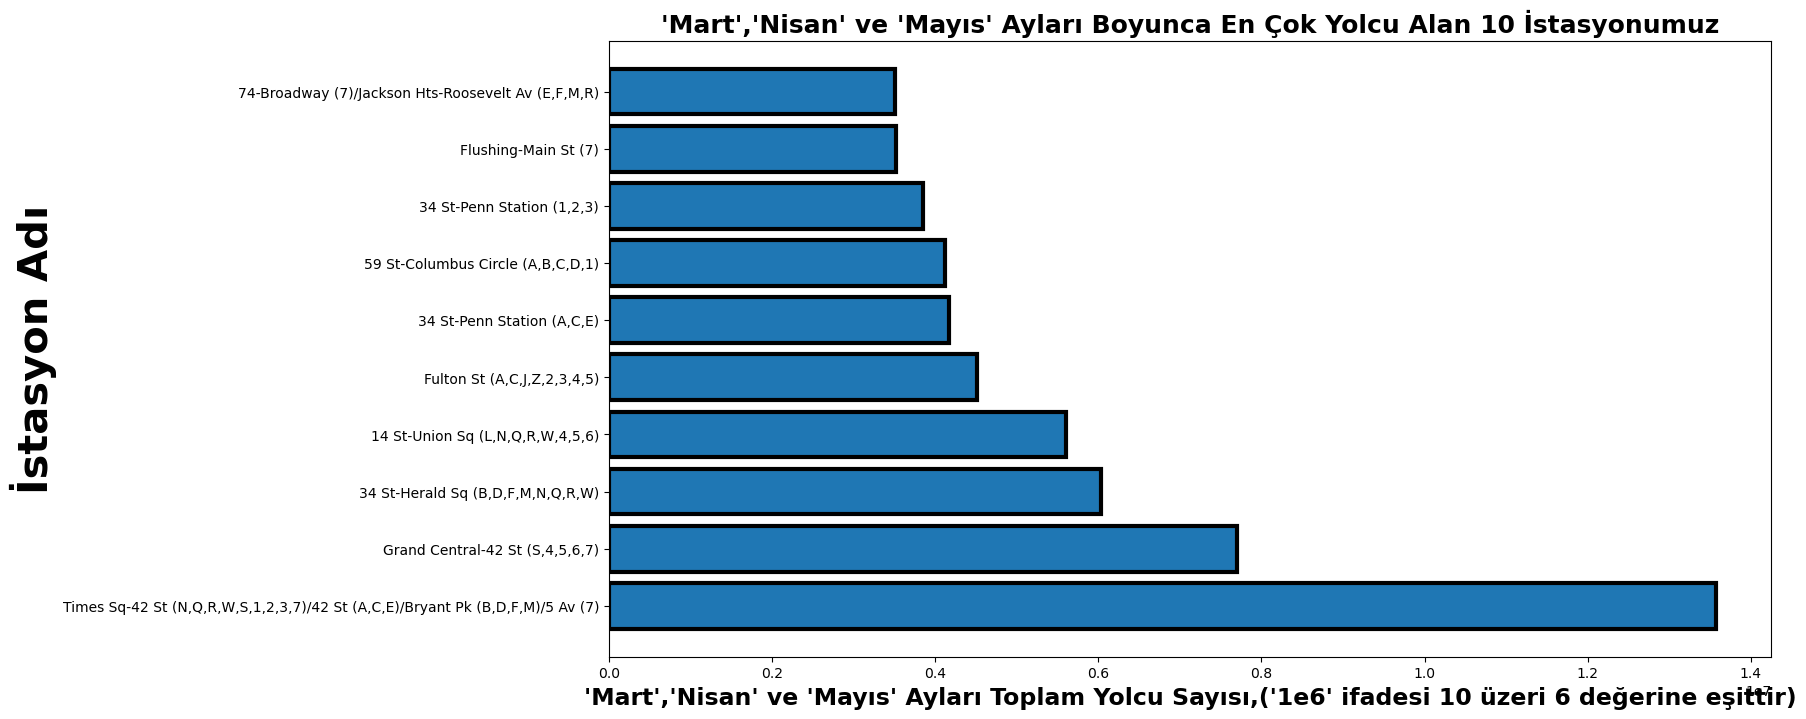

In [349]:
plt.figure(figsize=[15,8])
x=df_grouped.station_complex
y=df_grouped.ridership
plt.xlabel("'Mart','Nisan' ve 'Mayıs' Ayları Toplam Yolcu Sayısı,('1e6' ifadesi 10 üzeri 6 değerine eşittir)",fontsize=17,color='k',weight='bold')
plt.ylabel('İstasyon Adı',fontsize=30,color='k',weight='bold')
plt.title("'Mart','Nisan' ve 'Mayıs' Ayları Boyunca En Çok Yolcu Alan 10 İstasyonumuz",
fontsize=18,color='k',weight='bold',loc='center')
plt.barh(x,y,edgecolor='black',linewidth=3);


In [196]:
####### devamında ayrı ayrı her istasyona ait saatlik dilimlere göre yolcu sayısını gösteren grafikler eklenecektir

In [197]:
## en cok yolcu alan istasyonumuzun için grafik çalışmaları
df_grouped["station_complex"][1] 

'Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)'

In [198]:
df_times_Sq
df_times_Sq.groupby('time_group')[['ridership']].sum().sort_values("ridership",ascending=False)

,ridership
time_group,
19-23 Night,2813977
17-19 Evening,2729284
14-17 Late Afternoon,2527235
09-12 Late Morning,1666960
07-09 Morning,1418244
Late Night,1369561
12-14 Afternoon,1047633


In [199]:
df_times_Sq_graph=df_times_Sq.groupby('time_group')[['ridership']].sum().sort_values("ridership",ascending=False)

In [200]:
df_times_Sq_graph

,ridership
time_group,
19-23 Night,2813977
17-19 Evening,2729284
14-17 Late Afternoon,2527235
09-12 Late Morning,1666960
07-09 Morning,1418244
Late Night,1369561
12-14 Afternoon,1047633


In [201]:
df_times_Sq_graph.index

Index(['19-23 Night', '17-19 Evening', '14-17 Late Afternoon',
       '09-12 Late Morning', '07-09 Morning', 'Late Night', '12-14 Afternoon'],
      dtype='object', name='time_group')

In [202]:
df_times_Sq_graph.ridership

time_group
19-23 Night             2813977
17-19 Evening           2729284
14-17 Late Afternoon    2527235
09-12 Late Morning      1666960
07-09 Morning           1418244
Late Night              1369561
12-14 Afternoon         1047633
Name: ridership, dtype: int64

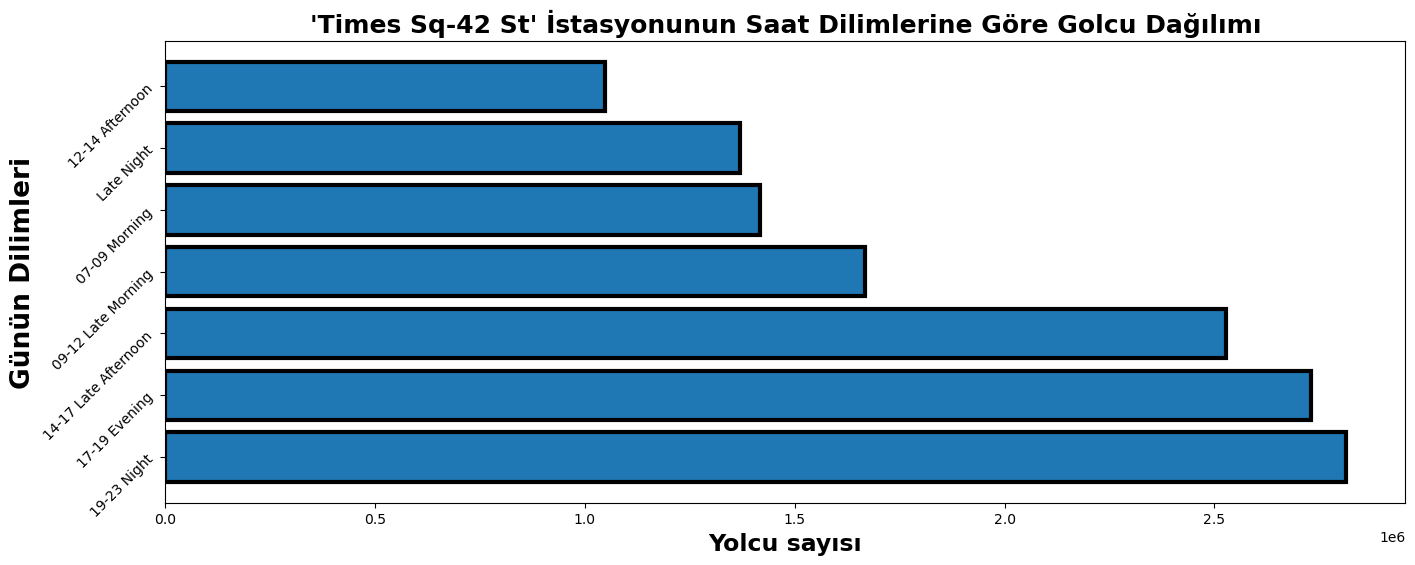

In [203]:
plt.figure(figsize=[16,6])
plt.title("'Times Sq-42 St' İstasyonunun Saat Dilimlerine Göre Golcu Dağılımı",fontweight="bold",fontsize=18)
plt.barh(df_times_Sq_graph.index,df_times_Sq_graph.ridership,edgecolor='black',linewidth=3)
plt.xlabel("Yolcu sayısı",fontsize=17,weight="bold")
plt.ylabel("Günün Dilimleri",fontsize=19,weight="bold")
plt.yticks(rotation=45, ha='right');


In [204]:
## en cok yolcu alan ikinci istasyonumuzun için grafik çalışmaları
df_grouped["station_complex"][2] 

'Grand Central-42 St (S,4,5,6,7)'

In [205]:
df_grand_graph=df_grand.groupby("time_group")[["ridership"]].sum().sort_values("ridership",ascending=False)

In [206]:
df_grand_graph

,ridership
time_group,
17-19 Evening,1841460
14-17 Late Afternoon,1569431
19-23 Night,1166000
09-12 Late Morning,1052441
07-09 Morning,942178
12-14 Afternoon,679908
Late Night,444973


In [207]:
df_grand_graph.index

Index(['17-19 Evening', '14-17 Late Afternoon', '19-23 Night',
       '09-12 Late Morning', '07-09 Morning', '12-14 Afternoon', 'Late Night'],
      dtype='object', name='time_group')

In [208]:
df_grand_graph.ridership

time_group
17-19 Evening           1841460
14-17 Late Afternoon    1569431
19-23 Night             1166000
09-12 Late Morning      1052441
07-09 Morning            942178
12-14 Afternoon          679908
Late Night               444973
Name: ridership, dtype: int64

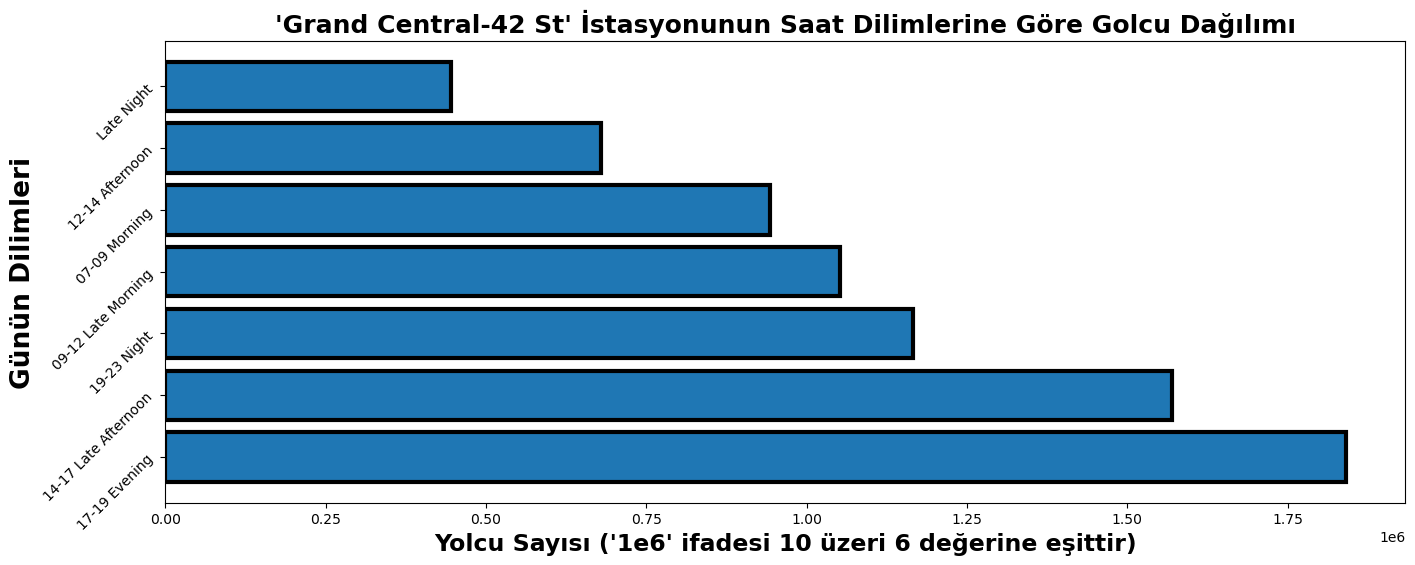

In [209]:
plt.figure(figsize=[16,6])
plt.title("'Grand Central-42 St' İstasyonunun Saat Dilimlerine Göre Golcu Dağılımı",fontweight="bold",fontsize=18)
plt.barh(df_grand_graph.index,df_grand_graph.ridership,edgecolor='black',linewidth=3)
plt.xlabel("Yolcu Sayısı ('1e6' ifadesi 10 üzeri 6 değerine eşittir)",fontsize=17,weight="bold")
plt.ylabel("Günün Dilimleri",fontsize=19,weight="bold")
plt.yticks(rotation=45, ha='right');


In [210]:
## en cok yolcu alan ucuncu istasyonumuzun için grafik çalışmaları
df_grouped["station_complex"][3] 

'34 St-Herald Sq (B,D,F,M,N,Q,R,W)'

In [211]:
df_St_Herald_graph=df_St_Herald.groupby('time_group').sum().sort_values('ridership',ascending=False)

In [212]:
df_St_Herald_graph

,ridership
time_group,
17-19 Evening,1372401
19-23 Night,1280720
14-17 Late Afternoon,1277134
09-12 Late Morning,669238
12-14 Afternoon,545286
07-09 Morning,463534
Late Night,424646


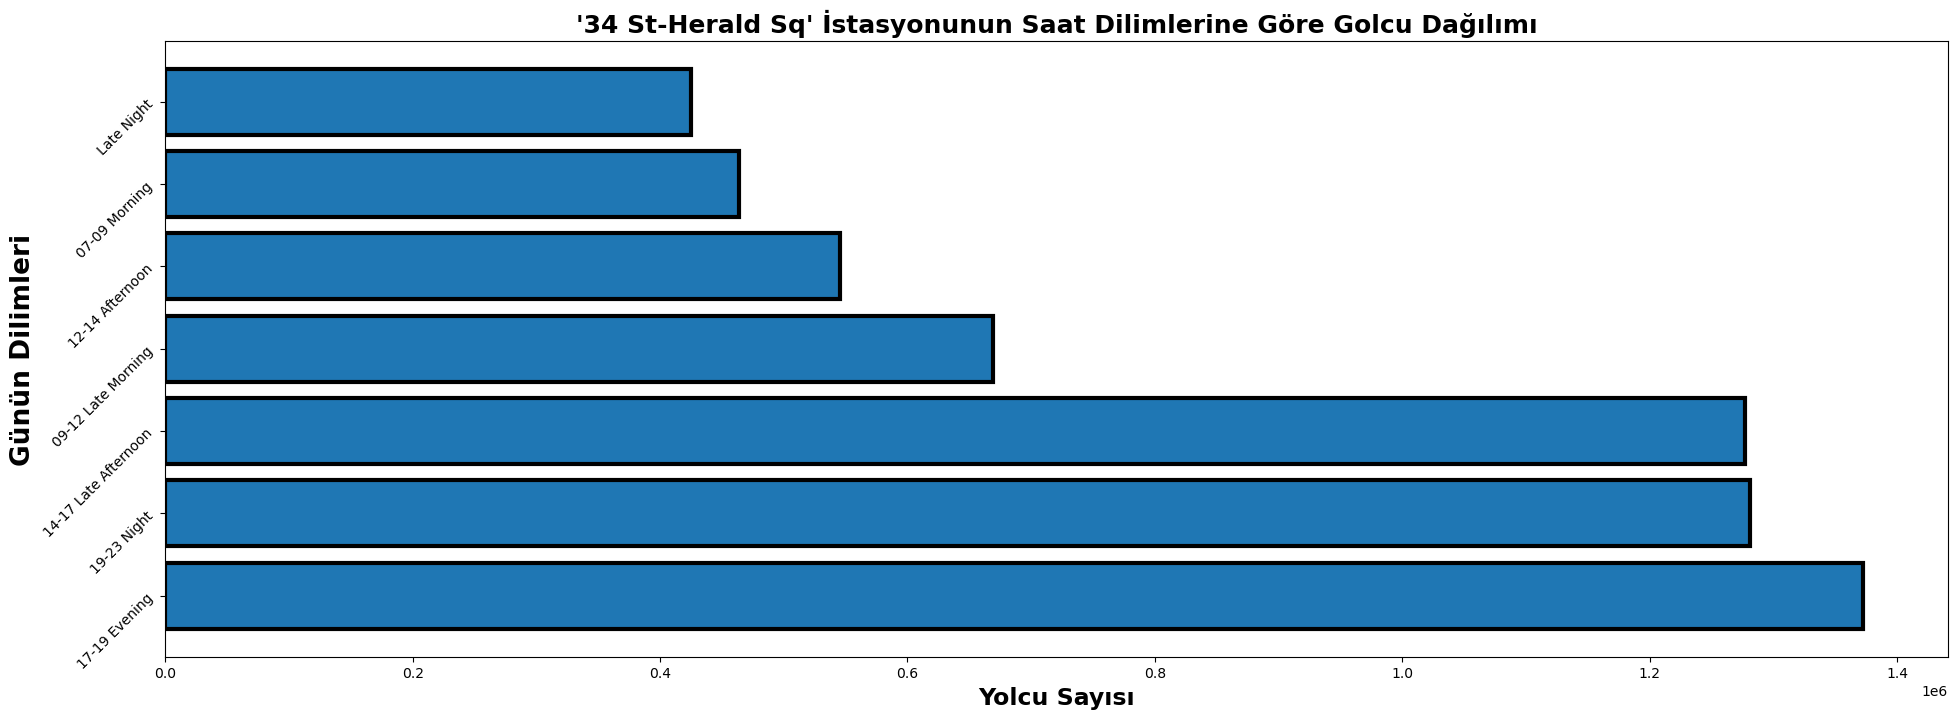

In [213]:
plt.figure(figsize=[23,8])
plt.title("'34 St-Herald Sq' İstasyonunun Saat Dilimlerine Göre Golcu Dağılımı",fontweight="bold",fontsize=18)
plt.barh(df_St_Herald_graph.index,df_St_Herald_graph.ridership,edgecolor='black',linewidth=3)
plt.xlabel("Yolcu Sayısı",fontsize=17,weight="bold")
plt.ylabel("Günün Dilimleri",fontsize=19,weight="bold")
plt.yticks(rotation=45, ha='right');

In [214]:
## en cok yolcu alan dorduncu istasyonumuzun için grafik çalışmaları
df_grouped["station_complex"][4] 

'14 St-Union Sq (L,N,Q,R,W,4,5,6)'

In [215]:
df_14_St_Union_graph=df_14_St_Union.groupby('time_group').sum().sort_values('ridership',ascending=False)

In [216]:
df_14_St_Union_graph

,ridership
time_group,
14-17 Late Afternoon,1433625
19-23 Night,1268886
17-19 Evening,1156358
12-14 Afternoon,534971
09-12 Late Morning,519999
Late Night,375752
07-09 Morning,314148


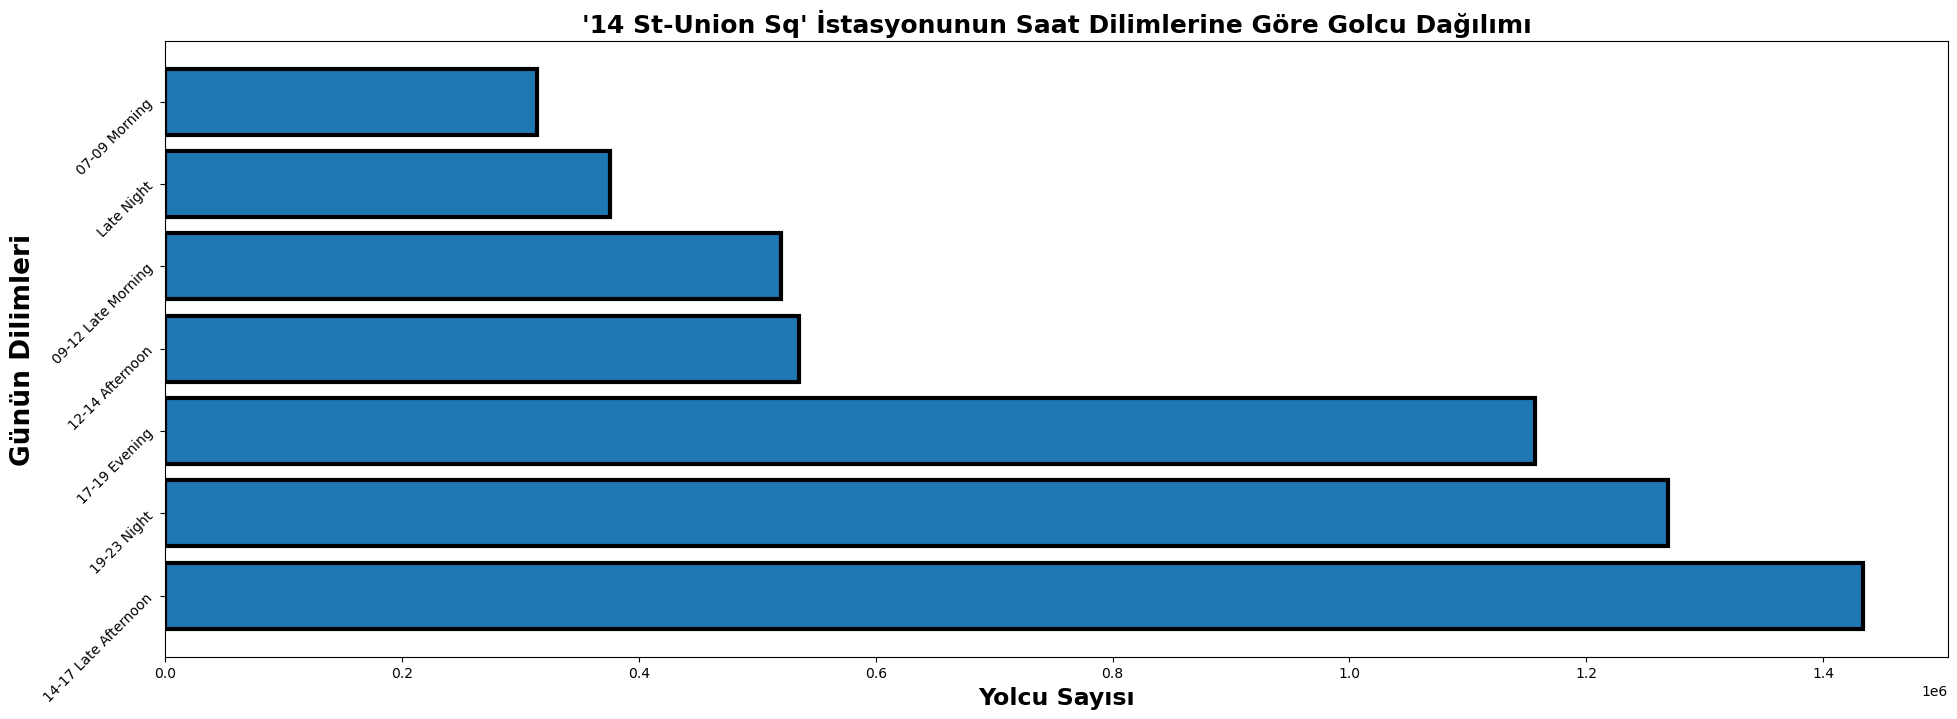

In [217]:
plt.figure(figsize=[23,8])
plt.title("'14 St-Union Sq' İstasyonunun Saat Dilimlerine Göre Golcu Dağılımı",fontweight="bold",fontsize=18)
plt.barh(df_14_St_Union_graph.index,df_14_St_Union_graph.ridership,edgecolor='black',linewidth=3)
plt.xlabel("Yolcu Sayısı",fontsize=17,weight="bold")
plt.ylabel("Günün Dilimleri",fontsize=19,weight="bold")
plt.yticks(rotation=45, ha='right');

In [218]:
## en cok yolcu alan besıncı istasyonumuzun için grafik çalışmaları
df_grouped["station_complex"][5] 

'Fulton St (A,C,J,Z,2,3,4,5)'

In [219]:
df_Fulton_St_graph=df_Fulton_St.groupby('time_group').sum().sort_values('ridership',ascending=False)

In [220]:
df_Fulton_St_graph

,ridership
time_group,
17-19 Evening,1152146
14-17 Late Afternoon,1096714
19-23 Night,669146
09-12 Late Morning,519622
07-09 Morning,434314
12-14 Afternoon,406297
Late Night,239039


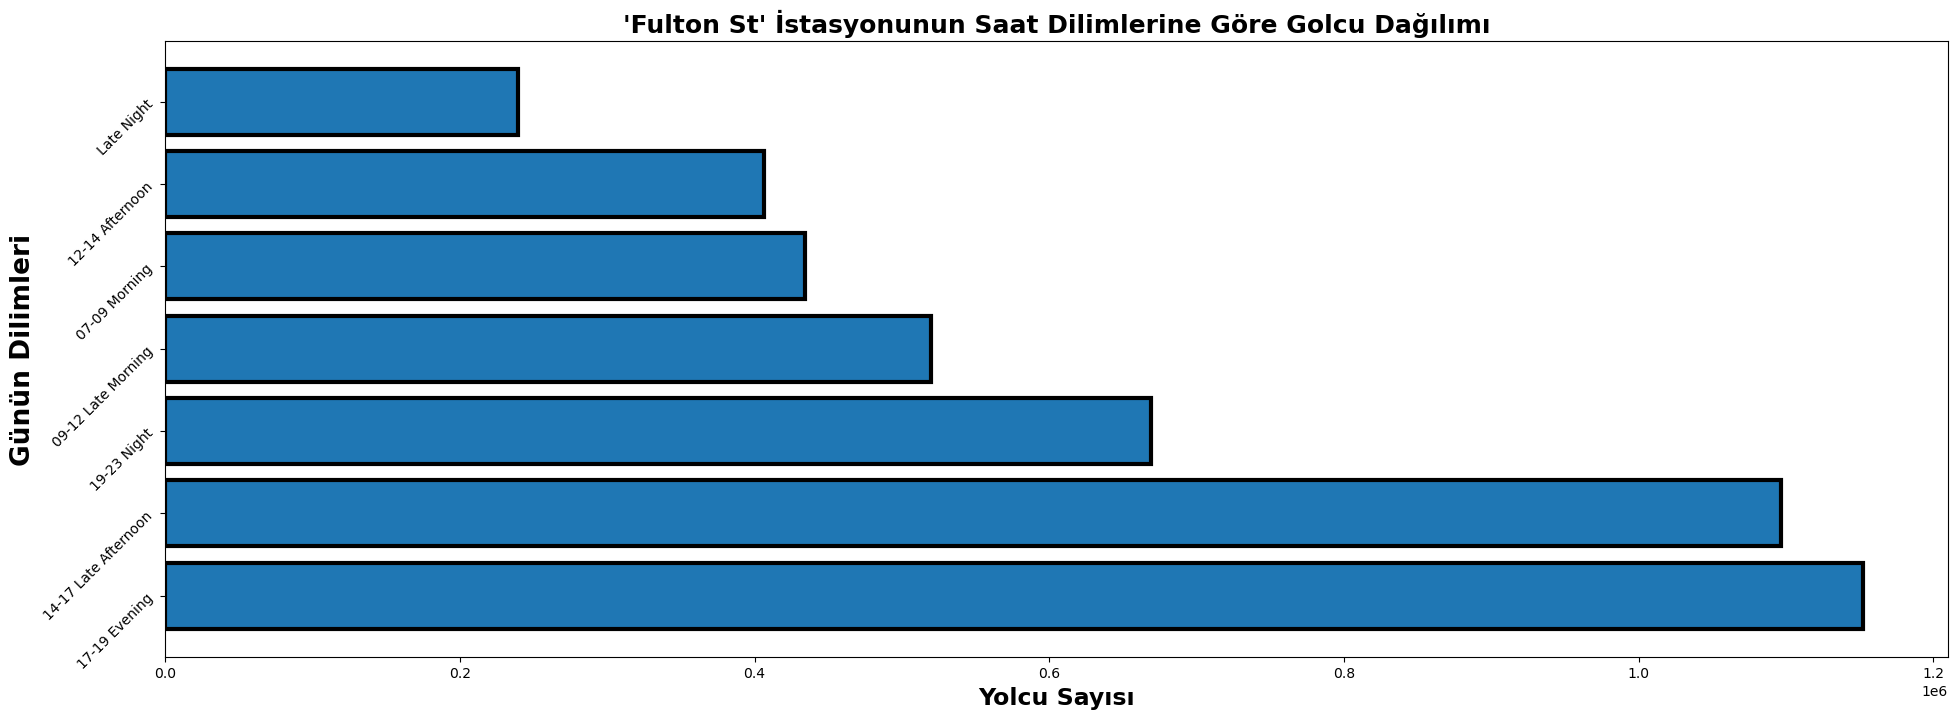

In [221]:
plt.figure(figsize=[23,8])
plt.title("'Fulton St' İstasyonunun Saat Dilimlerine Göre Golcu Dağılımı",fontweight="bold",fontsize=18)
plt.barh(df_Fulton_St_graph.index,df_Fulton_St_graph.ridership,edgecolor='black',linewidth=3)
plt.xlabel("Yolcu Sayısı",fontsize=17,weight="bold")
plt.ylabel("Günün Dilimleri",fontsize=19,weight="bold")
plt.yticks(rotation=45, ha='right');

In [222]:
## en cok yolcu alan altıncı istasyonumuzun için grafik çalışmaları
df_grouped["station_complex"][6] 

'34 St-Penn Station (A,C,E)'

In [223]:
df_34_St_Penn_graph=df_34_St_Penn.groupby('time_group').sum().sort_values('ridership',ascending=False)

In [224]:
df_34_St_Penn_graph

,ridership
time_group,
14-17 Late Afternoon,730129
17-19 Evening,722518
19-23 Night,685497
09-12 Late Morning,664092
07-09 Morning,647824
12-14 Afternoon,376275
Late Night,345279


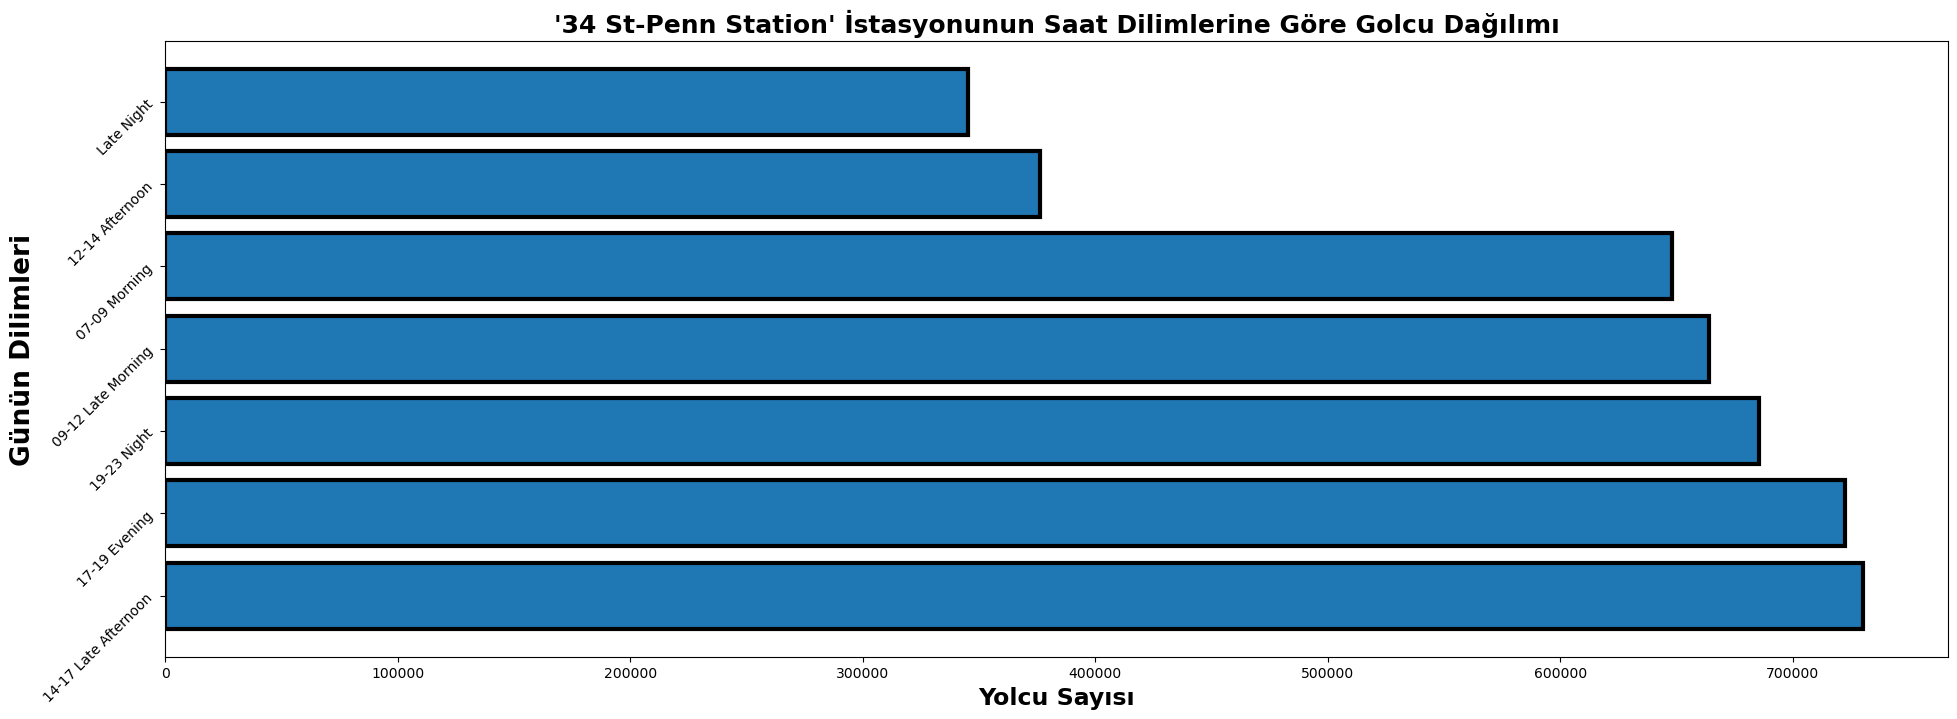

In [225]:
plt.figure(figsize=[23,8])
plt.title("'34 St-Penn Station' İstasyonunun Saat Dilimlerine Göre Golcu Dağılımı",fontweight="bold",fontsize=18)
plt.barh(df_34_St_Penn_graph.index,df_34_St_Penn_graph.ridership,edgecolor='black',linewidth=3)
plt.xlabel("Yolcu Sayısı",fontsize=17,weight="bold")
plt.ylabel("Günün Dilimleri",fontsize=19,weight="bold")
plt.yticks(rotation=45, ha='right');

In [226]:
## en cok yolcu alan yedinci istasyonumuzun için grafik çalışmaları
df_grouped["station_complex"][7] 

'59 St-Columbus Circle (A,B,C,D,1)'

In [227]:
df_59_St_Columbus_graph=df_59_St_Columbus.groupby('time_group').sum().sort_values('ridership',ascending=False)

In [228]:
df_59_St_Columbus_graph

,ridership
time_group,
14-17 Late Afternoon,1064741
17-19 Evening,881783
19-23 Night,816076
09-12 Late Morning,442013
12-14 Afternoon,423589
07-09 Morning,252368
Late Night,245702


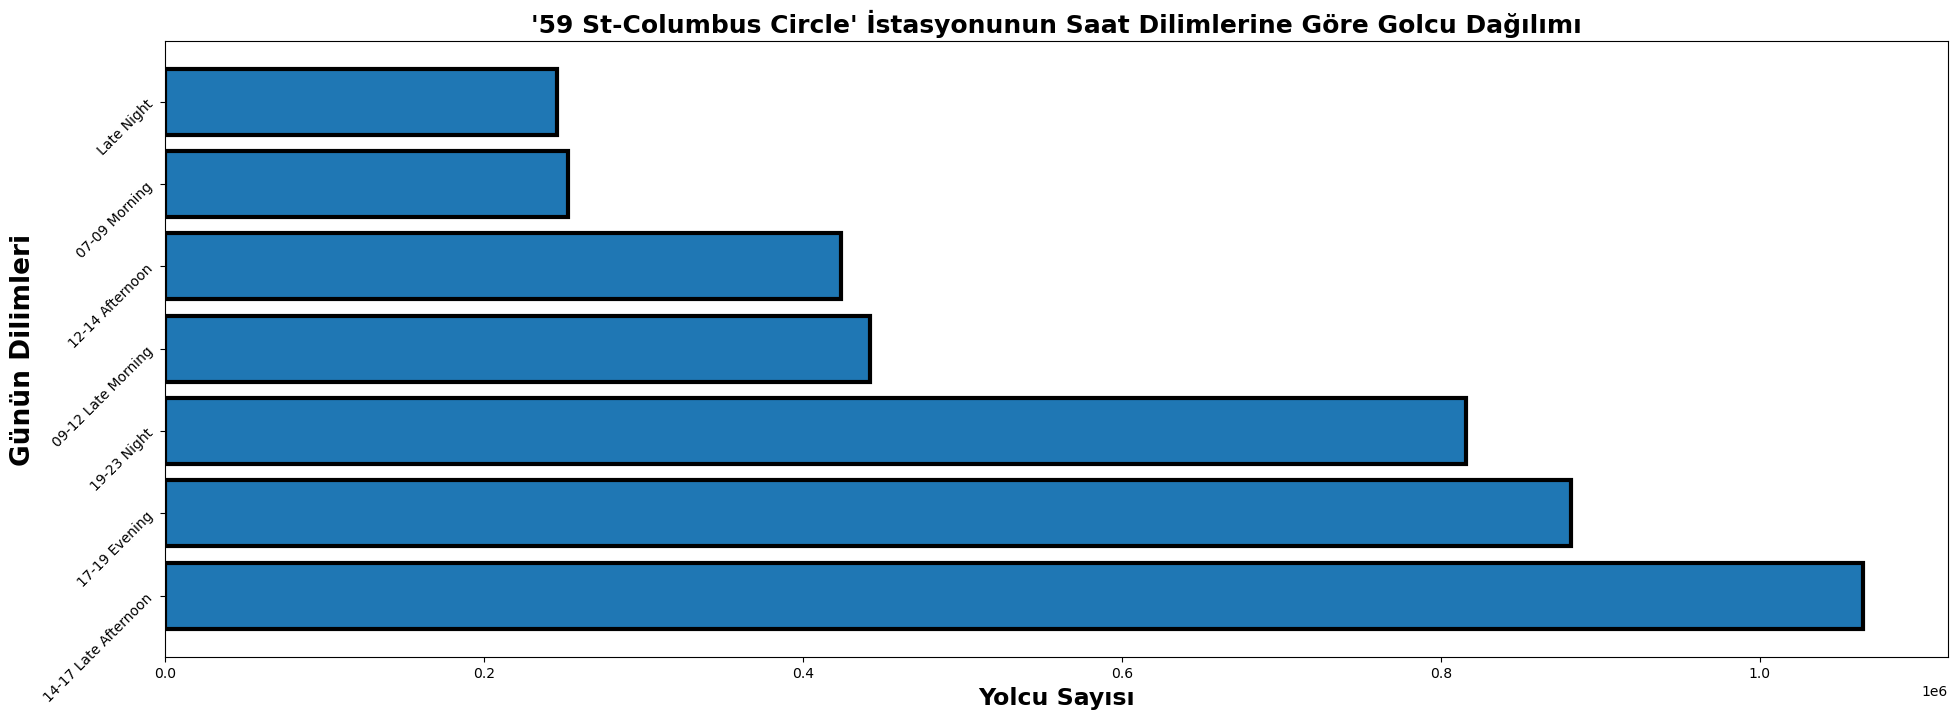

In [229]:
plt.figure(figsize=[23,8])
plt.title("'59 St-Columbus Circle' İstasyonunun Saat Dilimlerine Göre Golcu Dağılımı",fontweight="bold",fontsize=18)
plt.barh(df_59_St_Columbus_graph.index,df_59_St_Columbus_graph.ridership,edgecolor='black',linewidth=3)
plt.xlabel("Yolcu Sayısı",fontsize=17,weight="bold")
plt.ylabel("Günün Dilimleri",fontsize=19,weight="bold")
plt.yticks(rotation=45, ha='right');

In [230]:
## en cok yolcu alan sekizinci istasyonumuzun için grafik çalışmaları
df_grouped["station_complex"][8] 

'34 St-Penn Station (1,2,3)'

In [231]:
df_34_St_Penn_Station_1_2_3_graph=df_34_St_Penn_Station_1_2_3.groupby('time_group').sum().sort_values('ridership',ascending=False)

In [232]:
df_34_St_Penn_Station_1_2_3_graph

,ridership
time_group,
07-09 Morning,749811
14-17 Late Afternoon,628878
19-23 Night,607054
09-12 Late Morning,590181
17-19 Evening,583684
Late Night,368273
12-14 Afternoon,321575


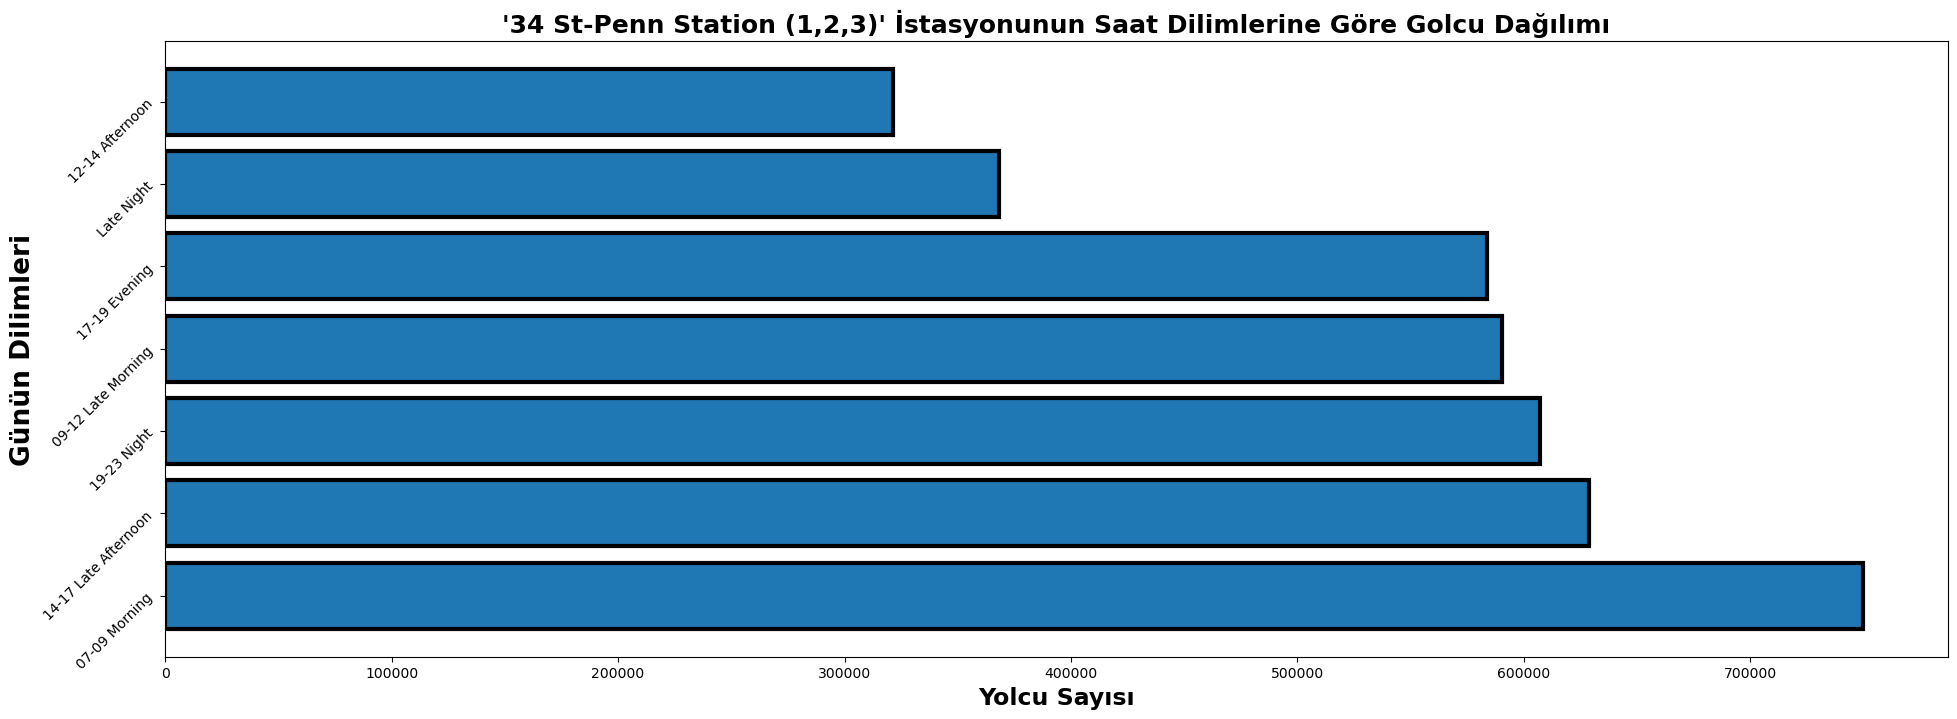

In [233]:
plt.figure(figsize=[23,8])
plt.title("'34 St-Penn Station (1,2,3)' İstasyonunun Saat Dilimlerine Göre Golcu Dağılımı",fontweight="bold",fontsize=18)
plt.barh(df_34_St_Penn_Station_1_2_3_graph.index,df_34_St_Penn_Station_1_2_3_graph.ridership,edgecolor='black',linewidth=3)
plt.xlabel("Yolcu Sayısı",fontsize=17,weight="bold")
plt.ylabel("Günün Dilimleri",fontsize=19,weight="bold")
plt.yticks(rotation=45, ha='right');

In [234]:
## en cok yolcu alan dokuzuncu istasyonumuzun için grafik çalışmaları
df_grouped["station_complex"][9] 

'Flushing-Main St (7)'

In [235]:
df_Flushing_main_graph=df_Flushing_main.groupby('time_group').sum().sort_values('ridership',ascending=False)

In [236]:
df_Flushing_main_graph

,ridership
time_group,
07-09 Morning,725202
14-17 Late Afternoon,623373
09-12 Late Morning,585272
19-23 Night,430639
Late Night,417320
17-19 Evening,411067
12-14 Afternoon,326755


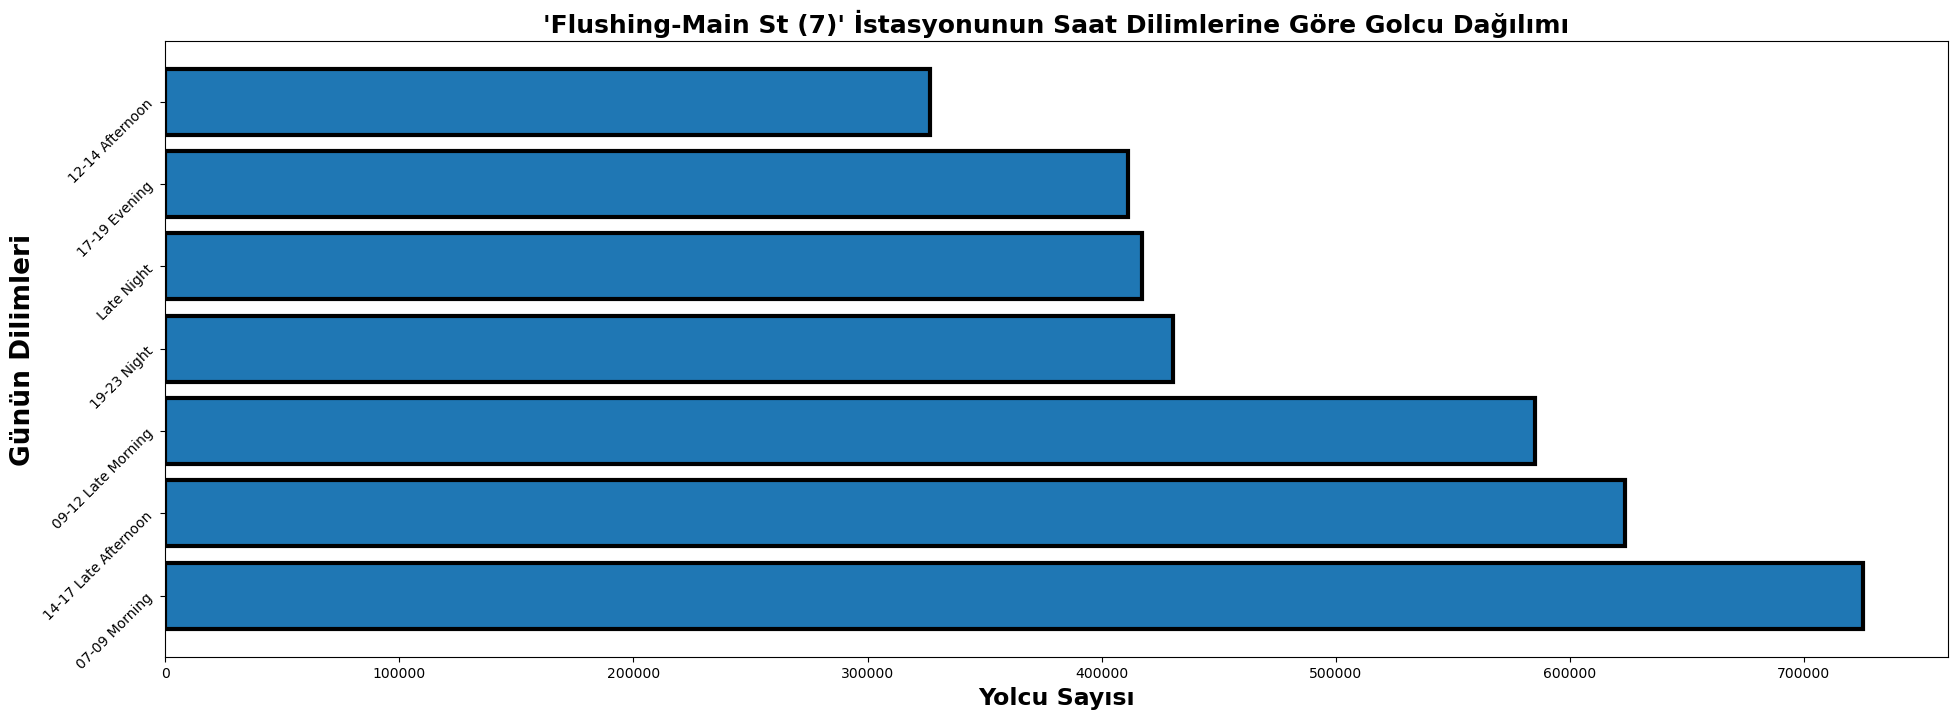

In [237]:
plt.figure(figsize=[23,8])
plt.title("'Flushing-Main St (7)' İstasyonunun Saat Dilimlerine Göre Golcu Dağılımı",fontweight="bold",fontsize=18)
plt.barh(df_Flushing_main_graph.index,df_Flushing_main_graph.ridership,edgecolor='black',linewidth=3)
plt.xlabel("Yolcu Sayısı",fontsize=17,weight="bold")
plt.ylabel("Günün Dilimleri",fontsize=19,weight="bold")
plt.yticks(rotation=45, ha='right');

In [238]:
## en cok yolcu alan onuncu istasyonumuzun için grafik çalışmaları
df_grouped["station_complex"][10] 

'74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,M,R)'

In [239]:
df_74_Broadway_graph=df_74_Broadway.groupby('time_group')[['ridership']].sum().sort_values('ridership',ascending=False)

In [240]:
df_74_Broadway_graph

,ridership
time_group,
07-09 Morning,663907
14-17 Late Afternoon,649032
09-12 Late Morning,631319
Late Night,424769
19-23 Night,413689
17-19 Evening,372996
12-14 Afternoon,349270


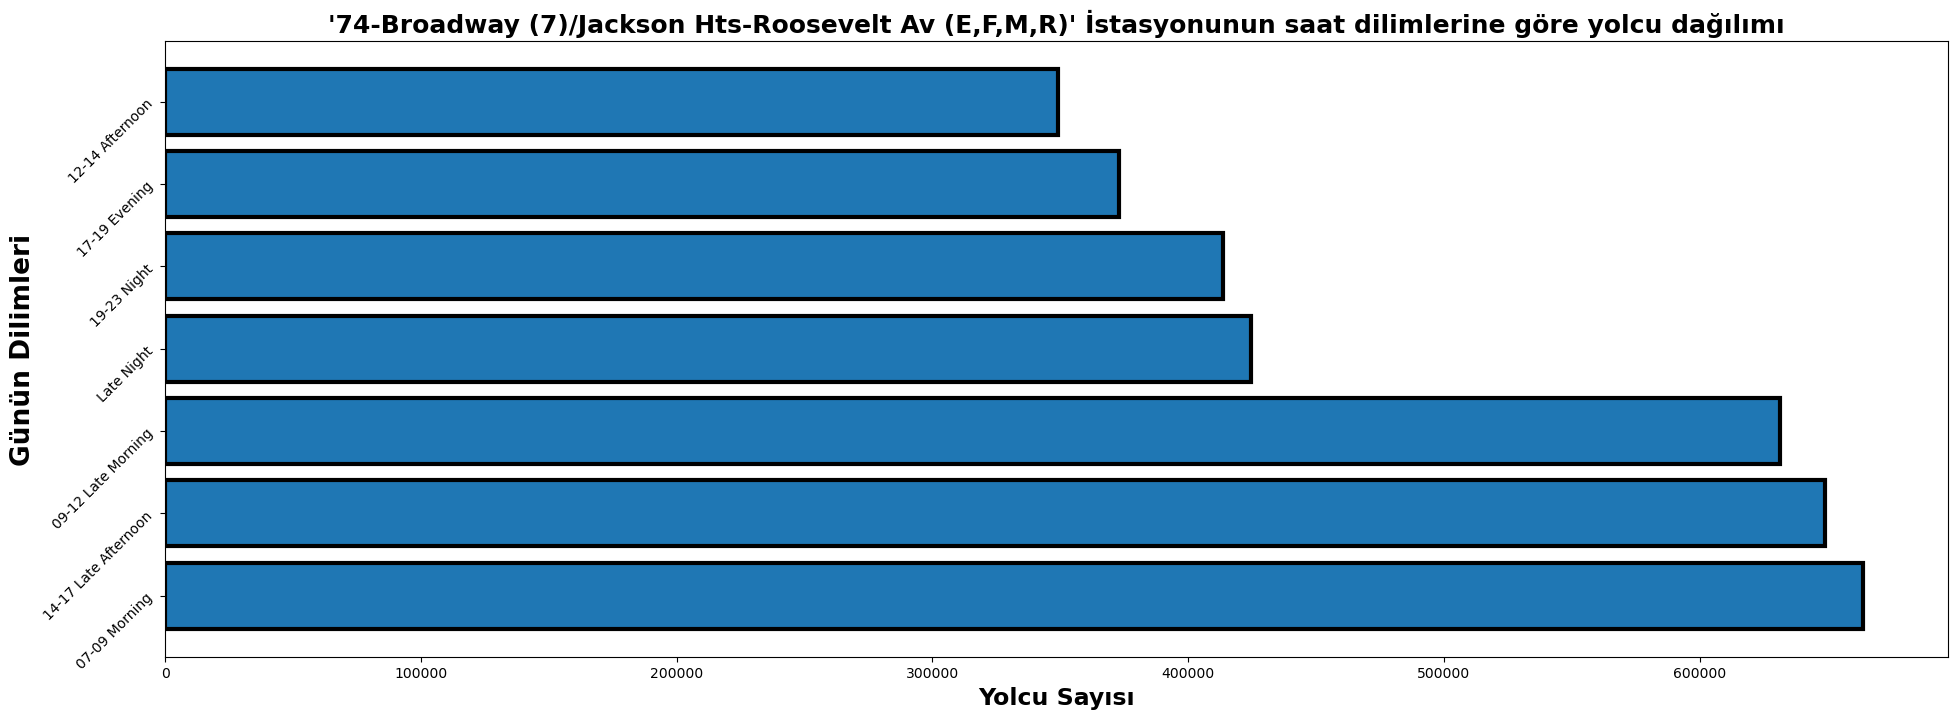

In [443]:
plt.figure(figsize=[23,8])
plt.title("'74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,M,R)' İstasyonunun saat dilimlerine göre yolcu dağılımı",fontweight="bold",fontsize=18)
plt.barh(df_74_Broadway_graph.index,df_74_Broadway_graph.ridership,edgecolor='black',linewidth=3)
plt.xlabel("Yolcu Sayısı",fontsize=17,weight="bold")
plt.ylabel("Günün Dilimleri",fontsize=19,weight="bold")
plt.yticks(rotation=45, ha='right');

In [242]:
df_1

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,date,time,time_group
19,05/22/2023 08:00:00 PM,R170,103 St (1),M,1,all,388,4,40.799446,-73.968376,POINT (-73.968376 40.799446),2023-05-22,20:00:00,19-23 Night
24,05/26/2023 05:00:00 AM,R252,103 St (6),M,6,all,93,1,40.790600,-73.947480,POINT (-73.94748 40.7906),2023-05-26,05:00:00,Late Night
30,05/02/2023 09:00:00 PM,H007,1 Av (L),M,L,all,663,15,40.730953,-73.981630,POINT (-73.98163 40.730953),2023-05-02,21:00:00,19-23 Night
37,05/27/2023 01:00:00 PM,R252,103 St (6),M,6,all,318,1,40.790600,-73.947480,POINT (-73.94748 40.7906),2023-05-27,13:00:00,12-14 Afternoon
38,05/02/2023 06:00:00 PM,R252,103 St (6),M,6,all,489,5,40.790600,-73.947480,POINT (-73.94748 40.7906),2023-05-02,18:00:00,17-19 Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4956059,04/05/2023 08:00:00 AM,R419,Zerega Av (6),BX,6,all,242,0,40.836487,-73.847040,POINT (-73.84704 40.836487),2023-04-05,08:00:00,07-09 Morning
4956067,03/29/2023 05:00:00 AM,R419,Zerega Av (6),BX,6,all,104,0,40.836487,-73.847040,POINT (-73.84704 40.836487),2023-03-29,05:00:00,Late Night
4956076,03/24/2023 03:00:00 AM,R419,Zerega Av (6),BX,6,all,5,0,40.836487,-73.847040,POINT (-73.84704 40.836487),2023-03-24,03:00:00,Late Night
4956077,05/15/2023 04:00:00 PM,R419,Zerega Av (6),BX,6,all,113,0,40.836487,-73.847040,POINT (-73.84704 40.836487),2023-05-15,16:00:00,14-17 Late Afternoon


In [444]:
############# gunler

In [445]:
df_1['transit_timestamp']=pd.to_datetime(df_1['transit_timestamp'],errors='raise')

C:\Users\selcu\AppData\Local\Temp\ipykernel_6632\2176934557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['transit_timestamp']=pd.to_datetime(df_1['transit_timestamp'],errors='raise')


In [446]:
df_1['day']=df_1['transit_timestamp'].dt.dayofweek

C:\Users\selcu\AppData\Local\Temp\ipykernel_6632\217397727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['day']=df_1['transit_timestamp'].dt.dayofweek


In [447]:
df_1

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,date,time,time_group,day,daystr
19,2023-05-22 20:00:00,R170,103 St (1),M,1,all,388,4,40.799446,-73.968376,POINT (-73.968376 40.799446),2023-05-22,20:00:00,19-23 Night,0,Monday
24,2023-05-26 05:00:00,R252,103 St (6),M,6,all,93,1,40.790600,-73.947480,POINT (-73.94748 40.7906),2023-05-26,05:00:00,Late Night,4,Friday
30,2023-05-02 21:00:00,H007,1 Av (L),M,L,all,663,15,40.730953,-73.981630,POINT (-73.98163 40.730953),2023-05-02,21:00:00,19-23 Night,1,Tuesday
37,2023-05-27 13:00:00,R252,103 St (6),M,6,all,318,1,40.790600,-73.947480,POINT (-73.94748 40.7906),2023-05-27,13:00:00,12-14 Afternoon,5,Saturday
38,2023-05-02 18:00:00,R252,103 St (6),M,6,all,489,5,40.790600,-73.947480,POINT (-73.94748 40.7906),2023-05-02,18:00:00,17-19 Evening,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4956059,2023-04-05 08:00:00,R419,Zerega Av (6),BX,6,all,242,0,40.836487,-73.847040,POINT (-73.84704 40.836487),2023-04-05,08:00:00,07-09 Morning,2,Wednesday
4956067,2023-03-29 05:00:00,R419,Zerega Av (6),BX,6,all,104,0,40.836487,-73.847040,POINT (-73.84704 40.836487),2023-03-29,05:00:00,Late Night,2,Wednesday
4956076,2023-03-24 03:00:00,R419,Zerega Av (6),BX,6,all,5,0,40.836487,-73.847040,POINT (-73.84704 40.836487),2023-03-24,03:00:00,Late Night,4,Friday
4956077,2023-05-15 16:00:00,R419,Zerega Av (6),BX,6,all,113,0,40.836487,-73.847040,POINT (-73.84704 40.836487),2023-05-15,16:00:00,14-17 Late Afternoon,0,Monday


In [448]:
df_1.day.max() ## gunler string olarak değil sayı olarak verilmiş bunu değiştirmeliyiz

6

In [449]:
def gunler(num):
    if num==0:
        return "Monday"
    elif num==1:
        return "Tuesday"
    elif num==2:
        return "Wednesday"
    elif num==3:
        return "Thursday"
    elif num==4:
        return "Friday"
    elif num==5:
        return "Saturday"
    else:
        return "Sunday"
    


In [450]:
df_1['daystr']=df_1['day'].apply(gunler)  ## tablomuza günleri string olarak ekliyoruz

C:\Users\selcu\AppData\Local\Temp\ipykernel_6632\3028682143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['daystr']=df_1['day'].apply(gunler)  ## tablomuza günleri string olarak ekliyoruz


In [451]:
df_1

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,date,time,time_group,day,daystr
19,2023-05-22 20:00:00,R170,103 St (1),M,1,all,388,4,40.799446,-73.968376,POINT (-73.968376 40.799446),2023-05-22,20:00:00,19-23 Night,0,Monday
24,2023-05-26 05:00:00,R252,103 St (6),M,6,all,93,1,40.790600,-73.947480,POINT (-73.94748 40.7906),2023-05-26,05:00:00,Late Night,4,Friday
30,2023-05-02 21:00:00,H007,1 Av (L),M,L,all,663,15,40.730953,-73.981630,POINT (-73.98163 40.730953),2023-05-02,21:00:00,19-23 Night,1,Tuesday
37,2023-05-27 13:00:00,R252,103 St (6),M,6,all,318,1,40.790600,-73.947480,POINT (-73.94748 40.7906),2023-05-27,13:00:00,12-14 Afternoon,5,Saturday
38,2023-05-02 18:00:00,R252,103 St (6),M,6,all,489,5,40.790600,-73.947480,POINT (-73.94748 40.7906),2023-05-02,18:00:00,17-19 Evening,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4956059,2023-04-05 08:00:00,R419,Zerega Av (6),BX,6,all,242,0,40.836487,-73.847040,POINT (-73.84704 40.836487),2023-04-05,08:00:00,07-09 Morning,2,Wednesday
4956067,2023-03-29 05:00:00,R419,Zerega Av (6),BX,6,all,104,0,40.836487,-73.847040,POINT (-73.84704 40.836487),2023-03-29,05:00:00,Late Night,2,Wednesday
4956076,2023-03-24 03:00:00,R419,Zerega Av (6),BX,6,all,5,0,40.836487,-73.847040,POINT (-73.84704 40.836487),2023-03-24,03:00:00,Late Night,4,Friday
4956077,2023-05-15 16:00:00,R419,Zerega Av (6),BX,6,all,113,0,40.836487,-73.847040,POINT (-73.84704 40.836487),2023-05-15,16:00:00,14-17 Late Afternoon,0,Monday


In [452]:
df_day=df_1.loc[::,['station_complex','ridership','date','time','time_group','daystr']]  # bu sutunları getiriyouz

In [453]:
df_day

,station_complex,ridership,date,time,time_group,daystr
19,103 St (1),388,2023-05-22,20:00:00,19-23 Night,Monday
24,103 St (6),93,2023-05-26,05:00:00,Late Night,Friday
30,1 Av (L),663,2023-05-02,21:00:00,19-23 Night,Tuesday
37,103 St (6),318,2023-05-27,13:00:00,12-14 Afternoon,Saturday
38,103 St (6),489,2023-05-02,18:00:00,17-19 Evening,Tuesday
...,...,...,...,...,...,...
4956059,Zerega Av (6),242,2023-04-05,08:00:00,07-09 Morning,Wednesday
4956067,Zerega Av (6),104,2023-03-29,05:00:00,Late Night,Wednesday
4956076,Zerega Av (6),5,2023-03-24,03:00:00,Late Night,Friday
4956077,Zerega Av (6),113,2023-05-15,16:00:00,14-17 Late Afternoon,Monday


In [454]:
## en cok yolcu alan istasyonlarımızı hatırlayalım
print(df_grouped["station_complex"][1] )
print(df_grouped["station_complex"][2] ) 
print(df_grouped["station_complex"][3] ) 
print(df_grouped["station_complex"][4] ) 
print(df_grouped["station_complex"][5] ) 
print(df_grouped["station_complex"][6] ) 
print(df_grouped["station_complex"][7] ) 
print(df_grouped["station_complex"][8] ) 
print(df_grouped["station_complex"][9] ) 
print(df_grouped["station_complex"][10] ) 

Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)
Grand Central-42 St (S,4,5,6,7)
34 St-Herald Sq (B,D,F,M,N,Q,R,W)
14 St-Union Sq (L,N,Q,R,W,4,5,6)
Fulton St (A,C,J,Z,2,3,4,5)
34 St-Penn Station (A,C,E)
59 St-Columbus Circle (A,B,C,D,1)
34 St-Penn Station (1,2,3)
Flushing-Main St (7)
74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,M,R)


In [455]:
df_day['station_complex']=="Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)"

## bu istasyon adına sahip olanları soruyoruz

19         False
24         False
30         False
37         False
38         False
           ...  
4956059    False
4956067    False
4956076    False
4956077    False
4956080    False
Name: station_complex, Length: 914467, dtype: bool

In [456]:
df_day[df_day['station_complex']=="Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)"]

## bu istasyon adına sahip olanları getiriyoruz

,station_complex,ridership,date,time,time_group,daystr
4653227,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",7979,2023-04-17,19:00:00,19-23 Night,Monday
4653240,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",6016,2023-05-16,10:00:00,09-12 Late Morning,Tuesday
4653259,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",7918,2023-04-14,20:00:00,19-23 Night,Friday
4653306,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",17363,2023-04-17,17:00:00,17-19 Evening,Monday
4653319,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",408,2023-05-04,02:00:00,Late Night,Thursday
...,...,...,...,...,...,...
4682738,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",9124,2023-03-30,09:00:00,09-12 Late Morning,Thursday
4682749,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",2413,2023-05-28,08:00:00,07-09 Morning,Sunday
4682756,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",4317,2023-05-20,09:00:00,09-12 Late Morning,Saturday
4682763,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",5311,2023-04-23,21:00:00,19-23 Night,Sunday


In [457]:
df_day_times_sq=df_day[df_day['station_complex']=="Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)"]

In [458]:
df_day_times_sq ## sadece times sq istasyonunun bilgileri

,station_complex,ridership,date,time,time_group,daystr
4653227,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",7979,2023-04-17,19:00:00,19-23 Night,Monday
4653240,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",6016,2023-05-16,10:00:00,09-12 Late Morning,Tuesday
4653259,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",7918,2023-04-14,20:00:00,19-23 Night,Friday
4653306,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",17363,2023-04-17,17:00:00,17-19 Evening,Monday
4653319,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",408,2023-05-04,02:00:00,Late Night,Thursday
...,...,...,...,...,...,...
4682738,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",9124,2023-03-30,09:00:00,09-12 Late Morning,Thursday
4682749,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",2413,2023-05-28,08:00:00,07-09 Morning,Sunday
4682756,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",4317,2023-05-20,09:00:00,09-12 Late Morning,Saturday
4682763,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",5311,2023-04-23,21:00:00,19-23 Night,Sunday


In [459]:
df_day_times_sq.groupby(['daystr'])[['ridership']].sum().sort_values('ridership',ascending=False)
# times sq istasyonunun yolcu sayılarını gunlere göre ayırdık

,ridership
daystr,
Wednesday,2512142
Thursday,2264045
Tuesday,2253733
Friday,2004745
Monday,1861258
Saturday,1475525
Sunday,1201446


In [460]:
df_day_times_sq_graph=df_day_times_sq.groupby(['daystr'])[['ridership']].sum().sort_values('ridership',ascending=False) 

In [461]:
df_day_times_sq_graph

,ridership
daystr,
Wednesday,2512142
Thursday,2264045
Tuesday,2253733
Friday,2004745
Monday,1861258
Saturday,1475525
Sunday,1201446


In [462]:
df_day_times_sq_graph.index

Index(['Wednesday', 'Thursday', 'Tuesday', 'Friday', 'Monday', 'Saturday',
       'Sunday'],
      dtype='object', name='daystr')

In [463]:
df_day_times_sq_graph.ridership

daystr
Wednesday    2512142
Thursday     2264045
Tuesday      2253733
Friday       2004745
Monday       1861258
Saturday     1475525
Sunday       1201446
Name: ridership, dtype: int64

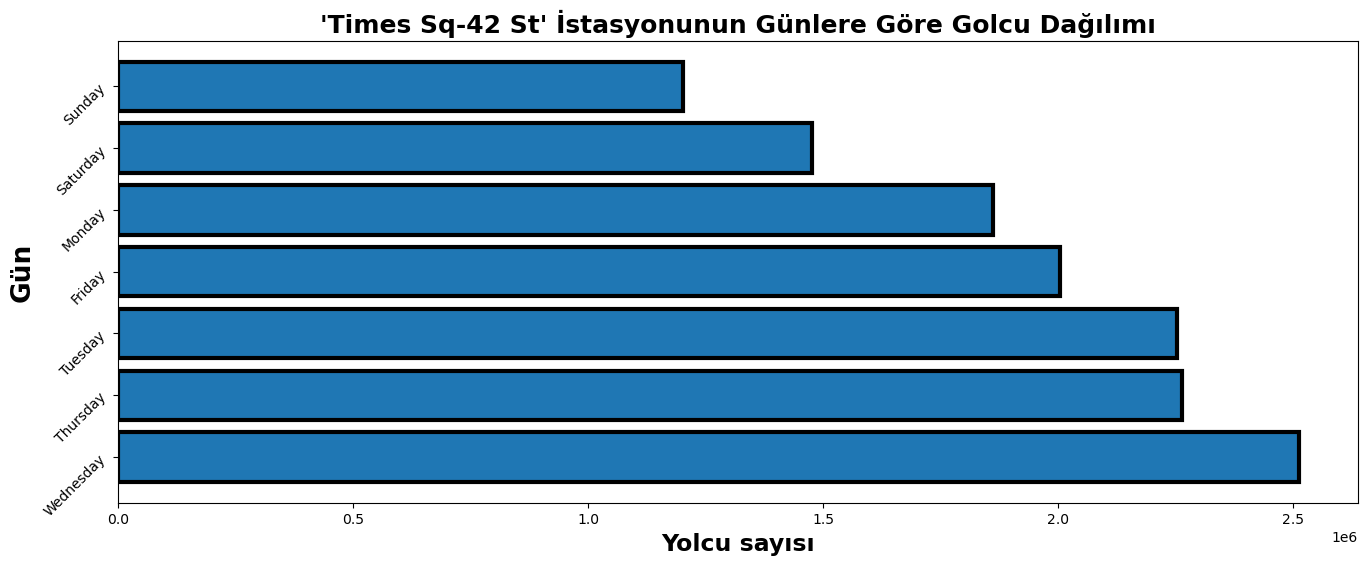

In [464]:
plt.figure(figsize=[16,6])
plt.title("'Times Sq-42 St' İstasyonunun Günlere Göre Golcu Dağılımı",fontweight="bold",fontsize=18)
plt.barh(df_day_times_sq_graph.index,df_day_times_sq_graph.ridership,edgecolor='black',linewidth=3)
plt.xlabel("Yolcu sayısı",fontsize=17,weight="bold")
plt.ylabel("Gün",fontsize=19,weight="bold")
plt.yticks(rotation=45, ha='right');


In [465]:
## en cok yolcu alan ikinci istasyonu gün bazında değerlendirelim

In [466]:
df_day_grand_central=df_day[df_day['station_complex']=="Grand Central-42 St (S,4,5,6,7)"]

In [467]:
df_day_grand_central

,station_complex,ridership,date,time,time_group,daystr
3258080,"Grand Central-42 St (S,4,5,6,7)",5005,2023-05-25,14:00:00,14-17 Late Afternoon,Thursday
3258090,"Grand Central-42 St (S,4,5,6,7)",6726,2023-04-20,15:00:00,14-17 Late Afternoon,Thursday
3258157,"Grand Central-42 St (S,4,5,6,7)",395,2023-03-18,06:00:00,Late Night,Saturday
3258159,"Grand Central-42 St (S,4,5,6,7)",110,2023-05-01,01:00:00,Late Night,Monday
3258172,"Grand Central-42 St (S,4,5,6,7)",259,2023-05-25,01:00:00,Late Night,Thursday
...,...,...,...,...,...,...
3289471,"Grand Central-42 St (S,4,5,6,7)",3541,2023-05-09,13:00:00,12-14 Afternoon,Tuesday
3289490,"Grand Central-42 St (S,4,5,6,7)",2386,2023-05-04,22:00:00,19-23 Night,Thursday
3289502,"Grand Central-42 St (S,4,5,6,7)",5181,2023-03-06,19:00:00,19-23 Night,Monday
3289515,"Grand Central-42 St (S,4,5,6,7)",210,2023-04-04,01:00:00,Late Night,Tuesday


In [468]:
df_day_grand_central.groupby(['daystr'])[['ridership']].sum().sort_values('ridership',ascending=False)

,ridership
daystr,
Wednesday,1519429
Tuesday,1386145
Thursday,1366106
Monday,1133991
Friday,1081611
Saturday,660594
Sunday,548515


In [469]:
df_day_grand_central_graph=df_day_grand_central.groupby(['daystr'])[['ridership']].sum().sort_values('ridership',ascending=False)

In [470]:
df_day_grand_central_graph

,ridership
daystr,
Wednesday,1519429
Tuesday,1386145
Thursday,1366106
Monday,1133991
Friday,1081611
Saturday,660594
Sunday,548515


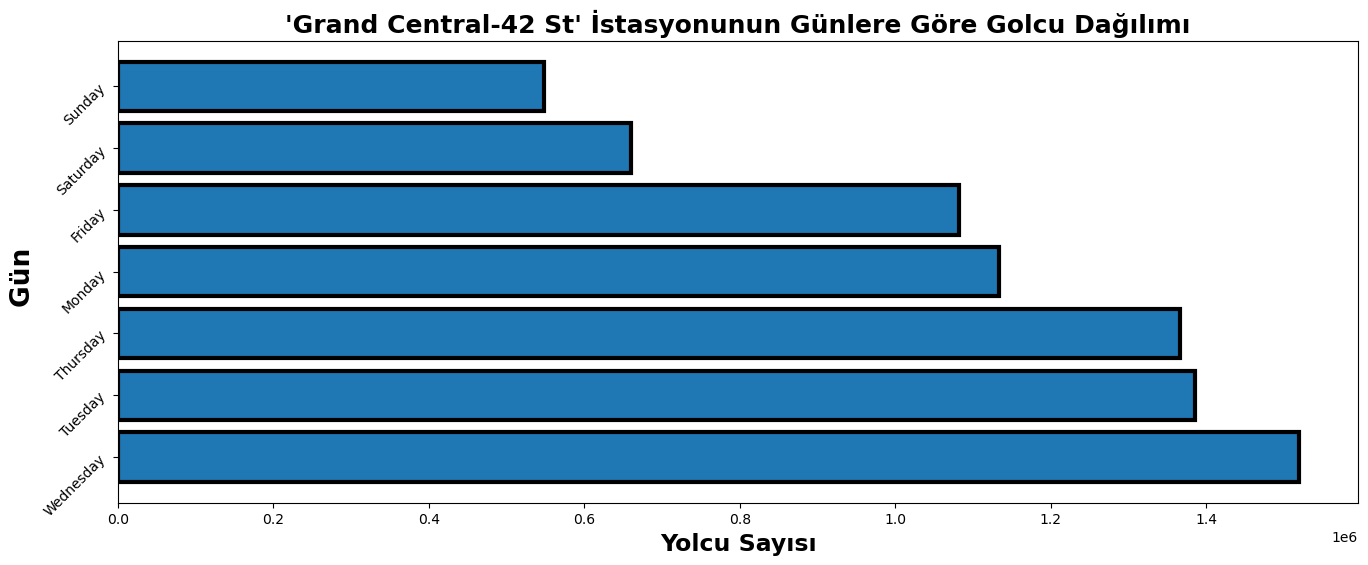

In [471]:
plt.figure(figsize=[16,6])
plt.title("'Grand Central-42 St' İstasyonunun Günlere Göre Golcu Dağılımı",fontweight="bold",fontsize=18)
plt.barh(df_day_grand_central_graph.index,df_day_grand_central_graph.ridership,edgecolor='black',linewidth=3)
plt.xlabel("Yolcu Sayısı",fontsize=17,weight="bold")
plt.ylabel("Gün ",fontsize=19,weight="bold")
plt.yticks(rotation=45, ha='right');

In [472]:
## en cok yolcu alan üçüncü istasyonu gün bazında değerlendirelim

In [473]:
df_day_34_st_herald=df_day[df_day['station_complex']=="34 St-Herald Sq (B,D,F,M,N,Q,R,W)"]

In [474]:
df_day_34_st_herald

,station_complex,ridership,date,time,time_group,daystr
994503,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",2837,2023-03-10,12:00:00,12-14 Afternoon,Friday
994525,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",2454,2023-05-18,10:00:00,09-12 Late Morning,Thursday
994532,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",206,2023-04-11,01:00:00,Late Night,Tuesday
994551,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",1965,2023-05-13,23:00:00,Late Night,Saturday
994561,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",3763,2023-04-05,20:00:00,19-23 Night,Wednesday
...,...,...,...,...,...,...
1025681,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",4370,2023-05-18,08:00:00,07-09 Morning,Thursday
1025690,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",736,2023-05-14,01:00:00,Late Night,Sunday
1025698,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",6229,2023-03-06,16:00:00,14-17 Late Afternoon,Monday
1025701,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",2760,2023-05-03,12:00:00,12-14 Afternoon,Wednesday


In [475]:
df_day_34_st_herald_graph=df_day_34_st_herald.groupby(['daystr'])[['ridership']].sum().sort_values('ridership',ascending=False) 

In [476]:
df_day_34_st_herald_graph

,ridership
daystr,
Wednesday,1075723
Thursday,998725
Tuesday,982083
Friday,916307
Monday,844486
Saturday,664923
Sunday,550712


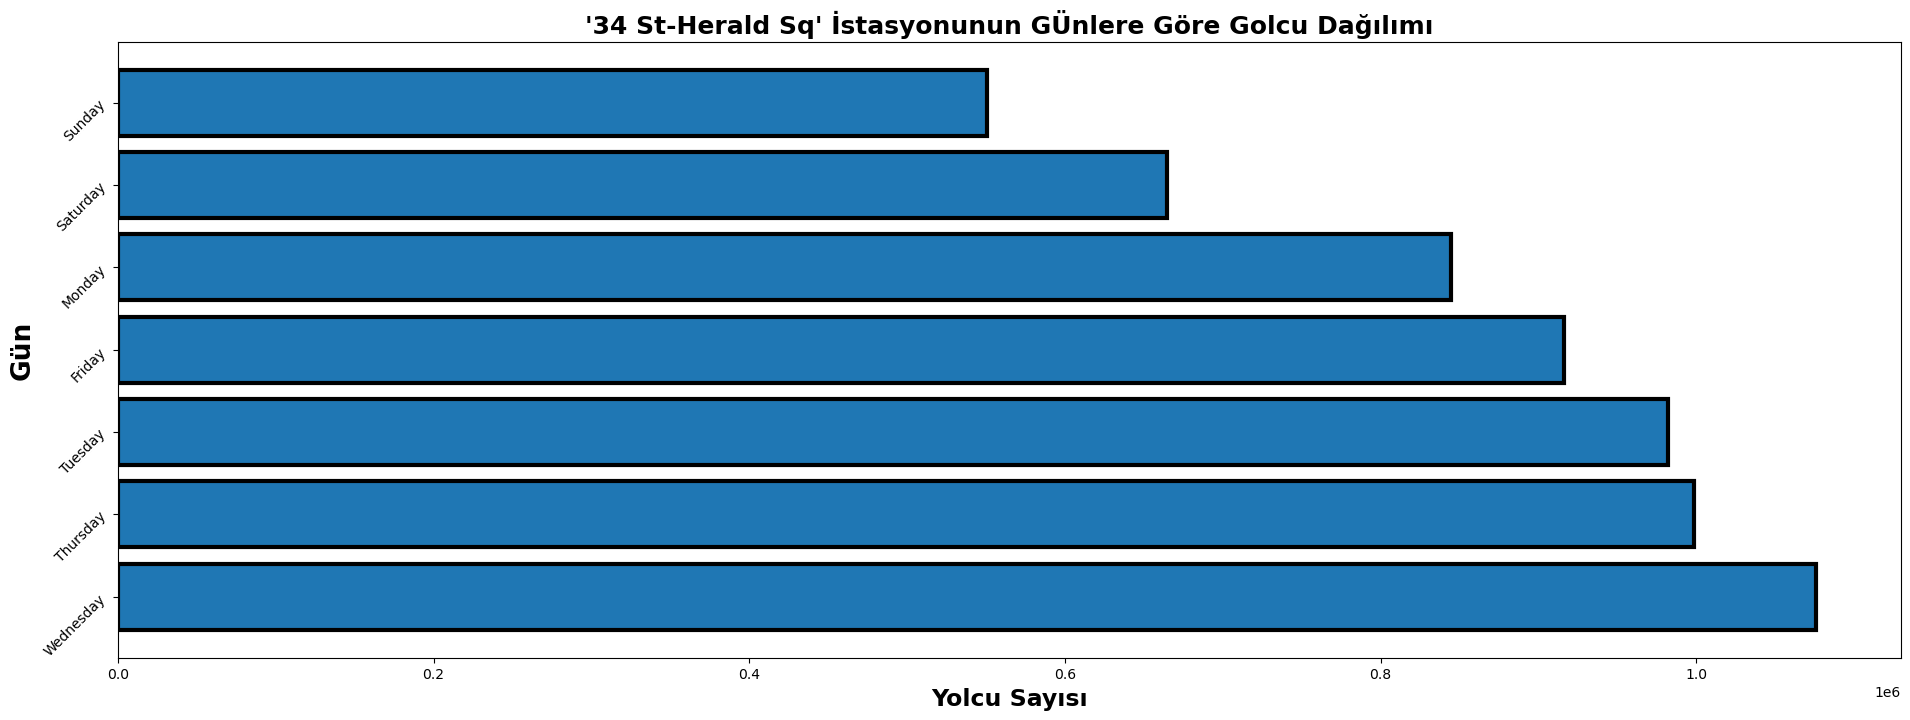

In [477]:
plt.figure(figsize=[23,8])
plt.title("'34 St-Herald Sq' İstasyonunun GÜnlere Göre Golcu Dağılımı",fontweight="bold",fontsize=18)
plt.barh(df_day_34_st_herald_graph.index,df_day_34_st_herald_graph.ridership,edgecolor='black',linewidth=3)
plt.xlabel("Yolcu Sayısı",fontsize=17,weight="bold")
plt.ylabel("Gün",fontsize=19,weight="bold")
plt.yticks(rotation=45, ha='right');

In [478]:
## en cok yolcu alan dördüncü istasyonu gün bazında değerlendirelim

In [479]:
df_day_14_st_union=df_day[df_day['station_complex']=="14 St-Union Sq (L,N,Q,R,W,4,5,6)"]

In [480]:
df_day_14_st_union

,station_complex,ridership,date,time,time_group,daystr
306123,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",444,2023-04-01,07:00:00,07-09 Morning,Saturday
306141,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",3540,2023-05-14,19:00:00,19-23 Night,Sunday
306188,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",507,2023-04-05,06:00:00,Late Night,Wednesday
306245,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",1854,2023-04-28,09:00:00,09-12 Late Morning,Friday
306248,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",1758,2023-03-23,10:00:00,09-12 Late Morning,Thursday
...,...,...,...,...,...,...
338530,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",3681,2023-03-17,20:00:00,19-23 Night,Friday
338535,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",2400,2023-03-25,22:00:00,19-23 Night,Saturday
338575,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",1560,2023-03-20,10:00:00,09-12 Late Morning,Monday
338587,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",2612,2023-05-22,08:00:00,07-09 Morning,Monday


In [481]:
df_day_14_st_union_graph=df_day_14_st_union.groupby(['daystr'])[['ridership']].sum().sort_values('ridership',ascending=False) 

In [482]:
df_day_14_st_union_graph

,ridership
daystr,
Wednesday,986656
Thursday,898720
Tuesday,881308
Friday,845800
Monday,754353
Saturday,699104
Sunday,537798


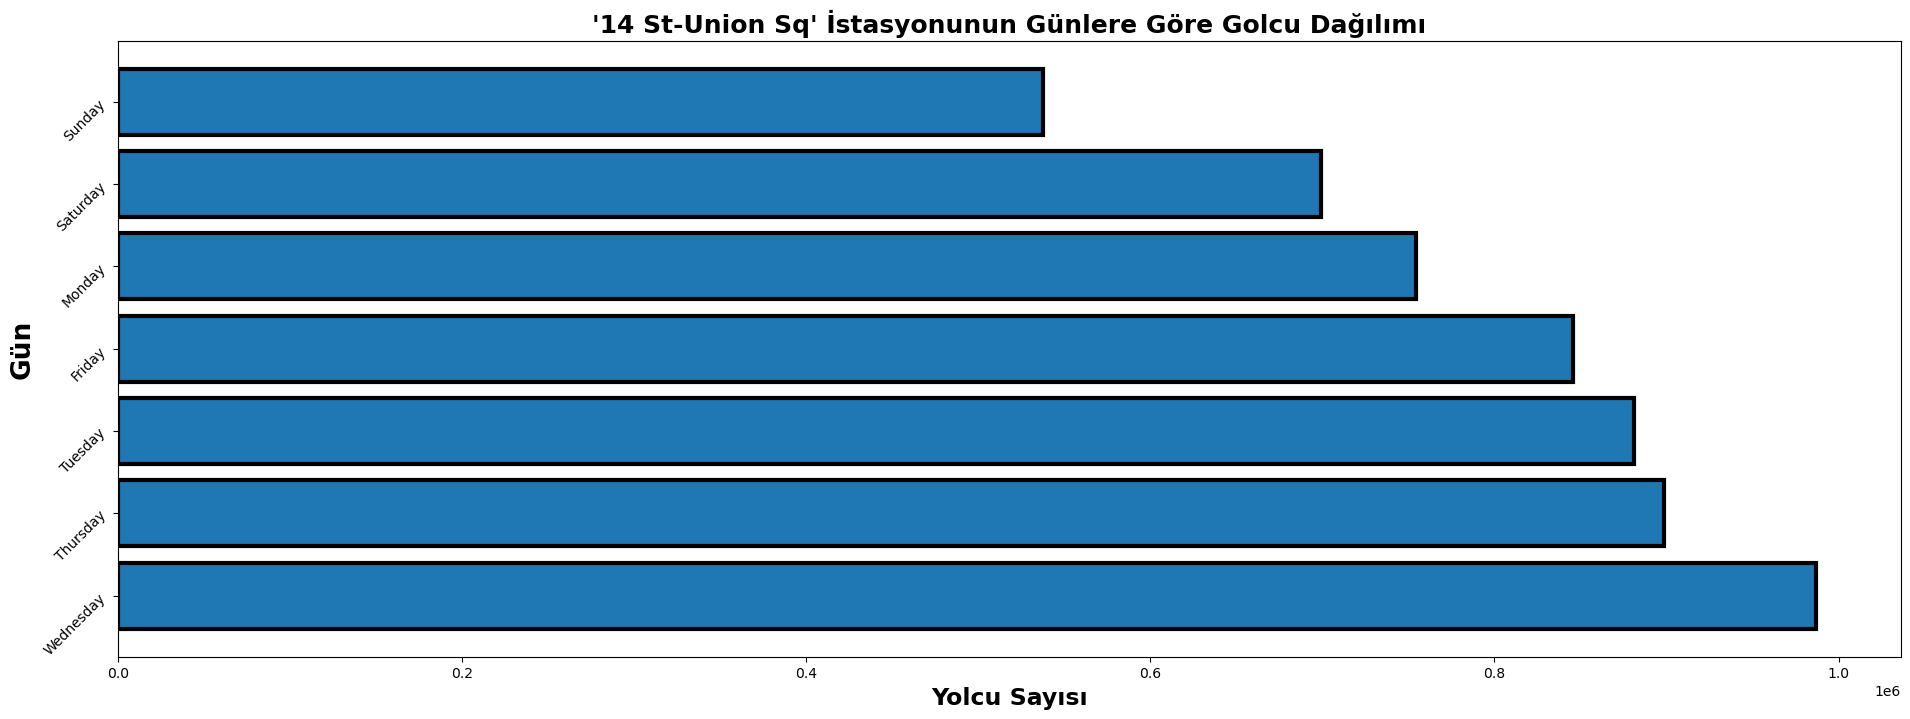

In [483]:
plt.figure(figsize=[23,8])
plt.title("'14 St-Union Sq' İstasyonunun Günlere Göre Golcu Dağılımı",fontweight="bold",fontsize=18)
plt.barh(df_day_14_st_union_graph.index,df_day_14_st_union_graph.ridership,edgecolor='black',linewidth=3)
plt.xlabel("Yolcu Sayısı",fontsize=17,weight="bold")
plt.ylabel("Gün",fontsize=19,weight="bold")
plt.yticks(rotation=45, ha='right');

In [484]:
## en cok yolcu alan besıncı istasyonu gün bazında değerlendirelim

In [485]:
df_day_Fulton=df_day[df_day['station_complex']=="Fulton St (A,C,J,Z,2,3,4,5)"]

In [486]:
df_day_Fulton

,station_complex,ridership,date,time,time_group,daystr
3191825,"Fulton St (A,C,J,Z,2,3,4,5)",2460,2023-03-24,13:00:00,12-14 Afternoon,Friday
3191838,"Fulton St (A,C,J,Z,2,3,4,5)",943,2023-04-10,06:00:00,Late Night,Monday
3191840,"Fulton St (A,C,J,Z,2,3,4,5)",4443,2023-04-18,15:00:00,14-17 Late Afternoon,Tuesday
3191868,"Fulton St (A,C,J,Z,2,3,4,5)",2538,2023-05-12,13:00:00,12-14 Afternoon,Friday
3191882,"Fulton St (A,C,J,Z,2,3,4,5)",505,2023-05-07,08:00:00,07-09 Morning,Sunday
...,...,...,...,...,...,...
3224092,"Fulton St (A,C,J,Z,2,3,4,5)",2230,2023-03-11,16:00:00,14-17 Late Afternoon,Saturday
3224094,"Fulton St (A,C,J,Z,2,3,4,5)",47,2023-03-02,02:00:00,Late Night,Thursday
3224113,"Fulton St (A,C,J,Z,2,3,4,5)",1974,2023-05-27,20:00:00,19-23 Night,Saturday
3224129,"Fulton St (A,C,J,Z,2,3,4,5)",9762,2023-04-13,17:00:00,17-19 Evening,Thursday


In [487]:
df_day_Fulton_graph=df_day_Fulton.groupby(['daystr'])[['ridership']].sum().sort_values('ridership',ascending=False) 

In [488]:
df_day_Fulton_graph

,ridership
daystr,
Wednesday,882002
Thursday,799845
Tuesday,797695
Friday,670792
Monday,650563
Saturday,399300
Sunday,317081


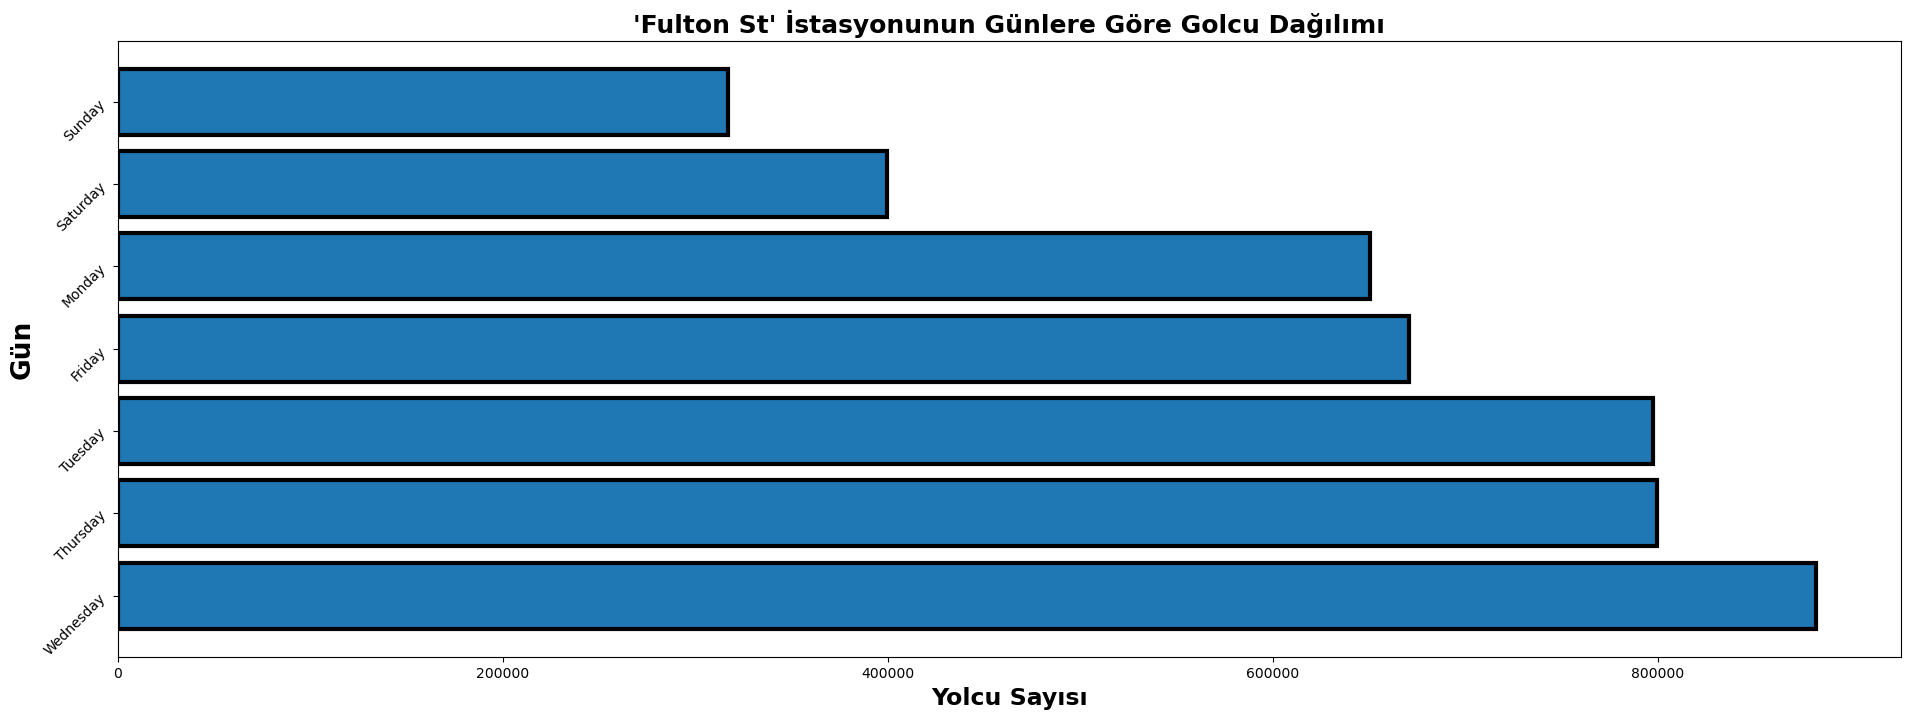

In [489]:
plt.figure(figsize=[23,8])
plt.title("'Fulton St' İstasyonunun Günlere Göre Golcu Dağılımı",fontweight="bold",fontsize=18)
plt.barh(df_day_Fulton_graph.index,df_day_Fulton_graph.ridership,edgecolor='black',linewidth=3)
plt.xlabel("Yolcu Sayısı",fontsize=17,weight="bold")
plt.ylabel("Gün",fontsize=19,weight="bold")
plt.yticks(rotation=45, ha='right');

In [490]:
## en cok yolcu alan altıncı istasyonu gün bazında değerlendirelim

In [491]:
df_day_34_st_Penn_ACE=df_day[df_day['station_complex']=="34 St-Penn Station (A,C,E)"]

In [492]:
df_day_34_st_Penn_ACE

,station_complex,ridership,date,time,time_group,daystr
1025753,"34 St-Penn Station (A,C,E)",2644,2023-05-05,14:00:00,14-17 Late Afternoon,Friday
1025773,"34 St-Penn Station (A,C,E)",69,2023-04-07,03:00:00,Late Night,Friday
1025774,"34 St-Penn Station (A,C,E)",4577,2023-05-18,09:00:00,09-12 Late Morning,Thursday
1025789,"34 St-Penn Station (A,C,E)",3042,2023-05-18,15:00:00,14-17 Late Afternoon,Thursday
1025805,"34 St-Penn Station (A,C,E)",181,2023-04-14,01:00:00,Late Night,Friday
...,...,...,...,...,...,...
1058288,"34 St-Penn Station (A,C,E)",4634,2023-05-01,17:00:00,17-19 Evening,Monday
1058312,"34 St-Penn Station (A,C,E)",267,2023-05-21,06:00:00,Late Night,Sunday
1058318,"34 St-Penn Station (A,C,E)",2067,2023-05-06,11:00:00,09-12 Late Morning,Saturday
1058320,"34 St-Penn Station (A,C,E)",95,2023-05-07,05:00:00,Late Night,Sunday


In [493]:
df_day_34_st_Penn_ACE_graph=df_day_34_st_Penn_ACE.groupby(['daystr'])[['ridership']].sum().sort_values('ridership',ascending=False) 

In [494]:
df_day_34_st_Penn_ACE_graph

,ridership
daystr,
Wednesday,762176
Tuesday,707464
Thursday,697248
Monday,607517
Friday,592882
Saturday,419701
Sunday,384626


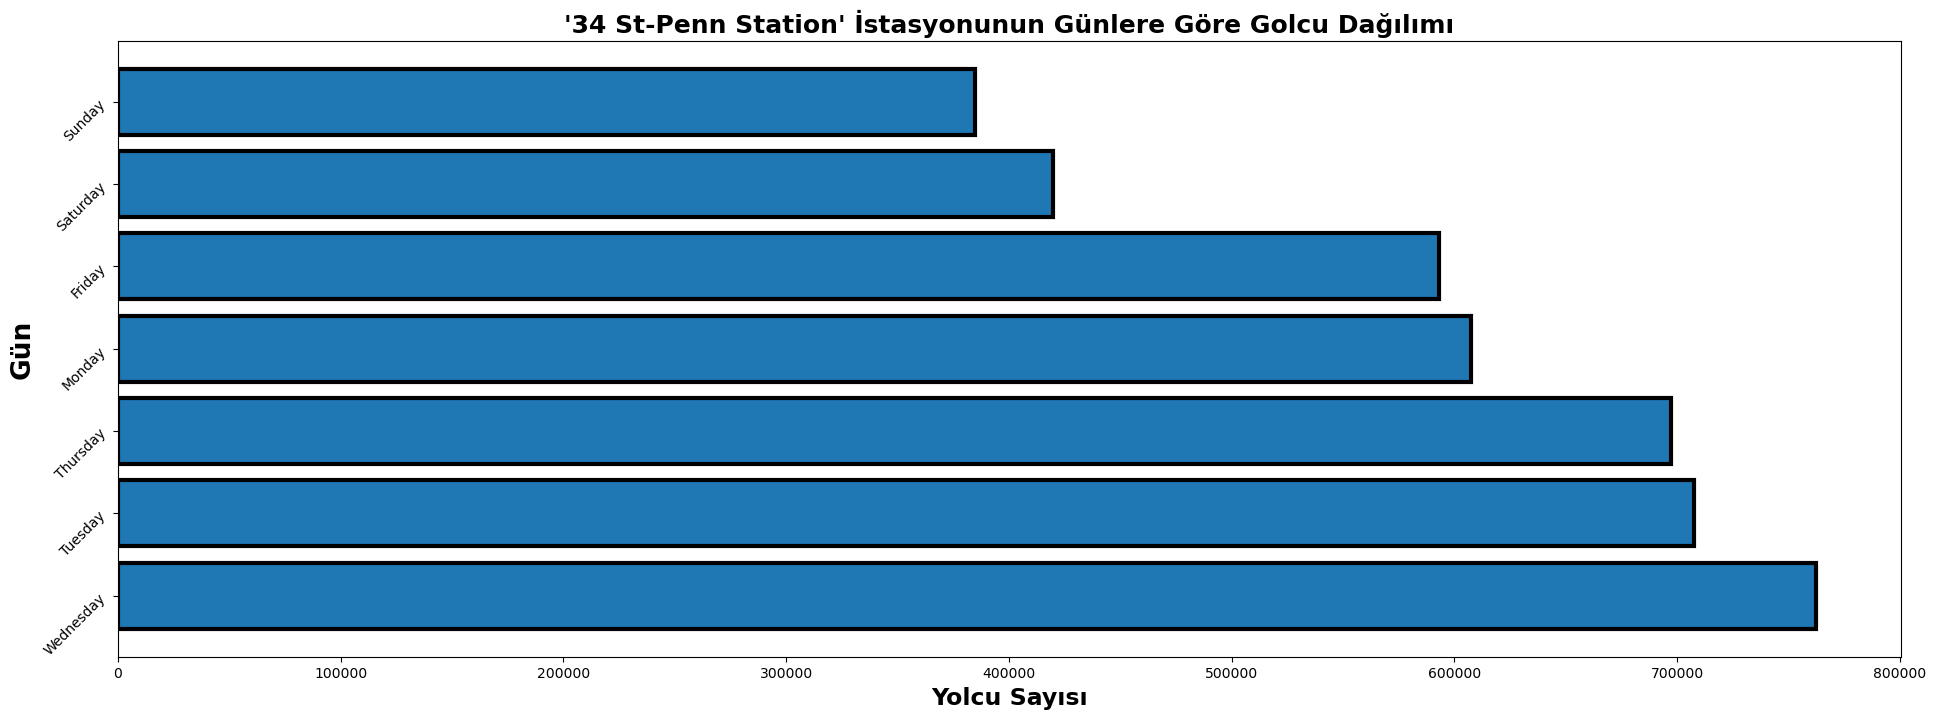

In [495]:
plt.figure(figsize=[23,8])
plt.title("'34 St-Penn Station' İstasyonunun Günlere Göre Golcu Dağılımı",fontweight="bold",fontsize=18)
plt.barh(df_day_34_st_Penn_ACE_graph.index,df_day_34_st_Penn_ACE_graph.ridership,edgecolor='black',linewidth=3)
plt.xlabel("Yolcu Sayısı",fontsize=17,weight="bold")
plt.ylabel("Gün",fontsize=19,weight="bold")
plt.yticks(rotation=45, ha='right');

In [496]:
## en cok yolcu alan yedinci istasyonu gün bazında değerlendirelim

In [497]:
df_day_59_st_colombus=df_day[df_day['station_complex']=="59 St-Columbus Circle (A,B,C,D,1)"]

In [498]:
df_day_59_st_colombus

,station_complex,ridership,date,time,time_group,daystr
1296209,"59 St-Columbus Circle (A,B,C,D,1)",5374,2023-04-10,17:00:00,17-19 Evening,Monday
1296234,"59 St-Columbus Circle (A,B,C,D,1)",1599,2023-03-13,10:00:00,09-12 Late Morning,Monday
1296240,"59 St-Columbus Circle (A,B,C,D,1)",148,2023-05-11,05:00:00,Late Night,Thursday
1296249,"59 St-Columbus Circle (A,B,C,D,1)",5020,2023-03-13,16:00:00,14-17 Late Afternoon,Monday
1296255,"59 St-Columbus Circle (A,B,C,D,1)",713,2023-05-12,00:00:00,Late Night,Friday
...,...,...,...,...,...,...
1328291,"59 St-Columbus Circle (A,B,C,D,1)",1400,2023-03-16,07:00:00,07-09 Morning,Thursday
1328297,"59 St-Columbus Circle (A,B,C,D,1)",1597,2023-03-01,11:00:00,09-12 Late Morning,Wednesday
1328299,"59 St-Columbus Circle (A,B,C,D,1)",129,2023-03-02,05:00:00,Late Night,Thursday
1328301,"59 St-Columbus Circle (A,B,C,D,1)",91,2023-05-11,02:00:00,Late Night,Thursday


In [499]:
df_day_59_st_colombus_graph=df_day_59_st_colombus.groupby(['daystr'])[['ridership']].sum().sort_values('ridership',ascending=False)

In [500]:
df_day_59_st_colombus_graph

,ridership
daystr,
Wednesday,738186
Thursday,680960
Tuesday,676546
Friday,605862
Monday,590882
Saturday,442503
Sunday,391333


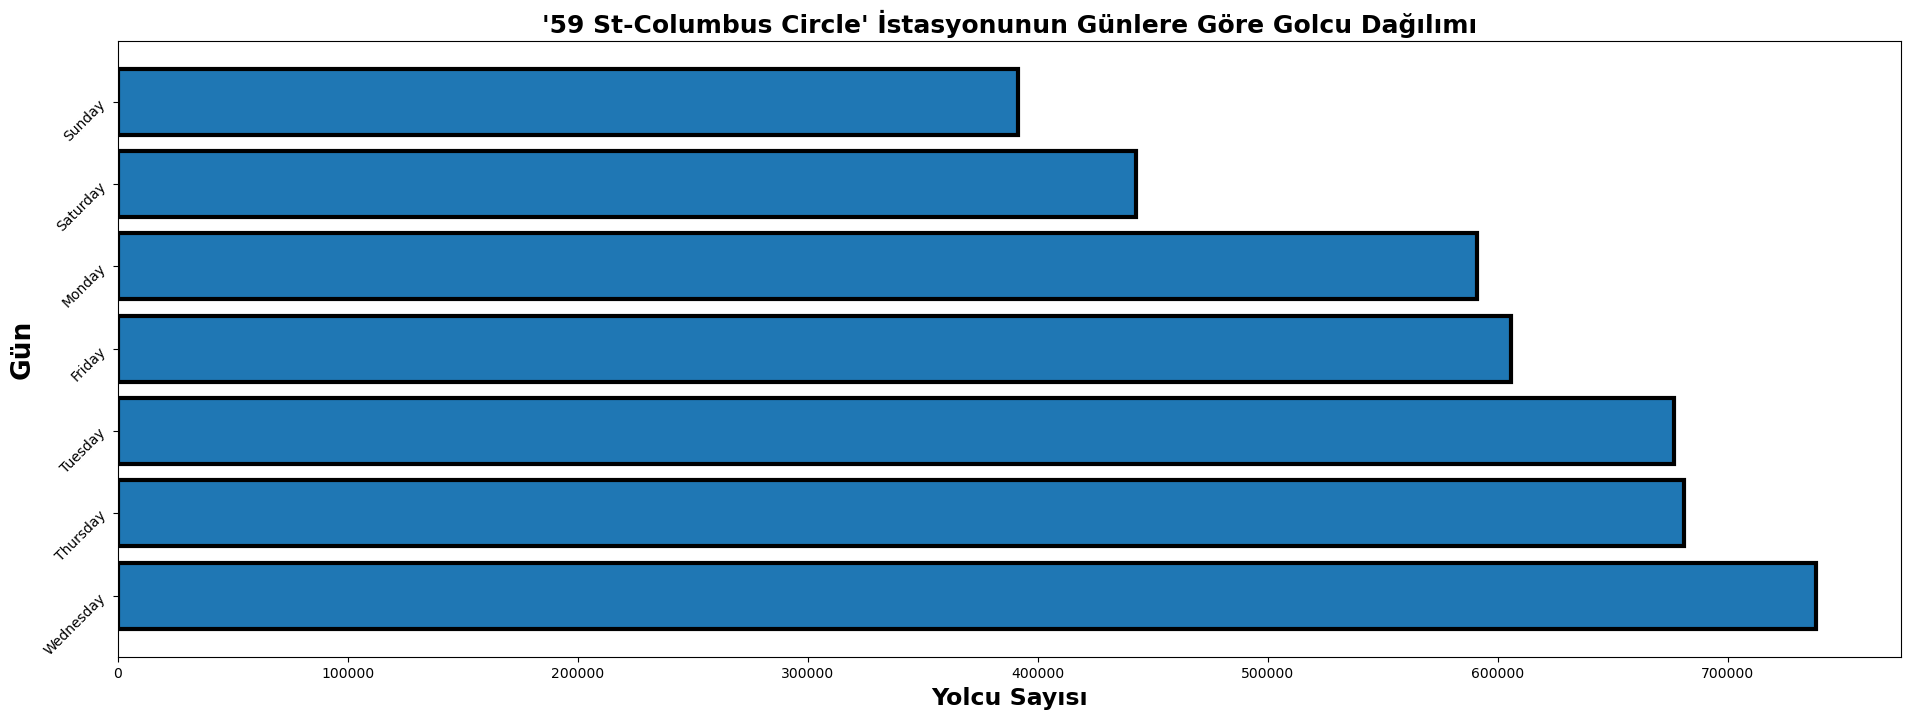

In [501]:
plt.figure(figsize=[23,8])
plt.title("'59 St-Columbus Circle' İstasyonunun Günlere Göre Golcu Dağılımı",fontweight="bold",fontsize=18)
plt.barh(df_day_59_st_colombus_graph.index,df_day_59_st_colombus_graph.ridership,edgecolor='black',linewidth=3)
plt.xlabel("Yolcu Sayısı",fontsize=17,weight="bold")
plt.ylabel("Gün",fontsize=19,weight="bold")
plt.yticks(rotation=45, ha='right');

In [502]:
## en cok yolcu alan sekizinci istasyonu gün bazında değerlendirelim

In [503]:
df_day_34_st_penn_123=df_day[df_day['station_complex']=="34 St-Penn Station (1,2,3)"]

In [504]:
df_day_34_st_penn_123

,station_complex,ridership,date,time,time_group,daystr
1025768,"34 St-Penn Station (1,2,3)",124,2023-04-11,01:00:00,Late Night,Tuesday
1025783,"34 St-Penn Station (1,2,3)",2904,2023-05-09,16:00:00,14-17 Late Afternoon,Tuesday
1025787,"34 St-Penn Station (1,2,3)",1184,2023-05-29,10:00:00,09-12 Late Morning,Monday
1025802,"34 St-Penn Station (1,2,3)",95,2023-04-08,02:00:00,Late Night,Saturday
1025851,"34 St-Penn Station (1,2,3)",647,2023-04-10,23:00:00,Late Night,Monday
...,...,...,...,...,...,...
1058294,"34 St-Penn Station (1,2,3)",2302,2023-03-23,15:00:00,14-17 Late Afternoon,Thursday
1058306,"34 St-Penn Station (1,2,3)",2031,2023-05-21,14:00:00,14-17 Late Afternoon,Sunday
1058315,"34 St-Penn Station (1,2,3)",2045,2023-05-13,15:00:00,14-17 Late Afternoon,Saturday
1058323,"34 St-Penn Station (1,2,3)",37,2023-04-17,03:00:00,Late Night,Monday


In [505]:
df_day_34_st_penn_123_graph=df_day_34_st_penn_123.groupby(['daystr'])[['ridership']].sum().sort_values('ridership',ascending=False)

In [506]:
df_day_34_st_penn_123_graph

,ridership
daystr,
Wednesday,713320
Tuesday,654448
Thursday,644243
Monday,557371
Friday,542510
Saturday,385262
Sunday,352302


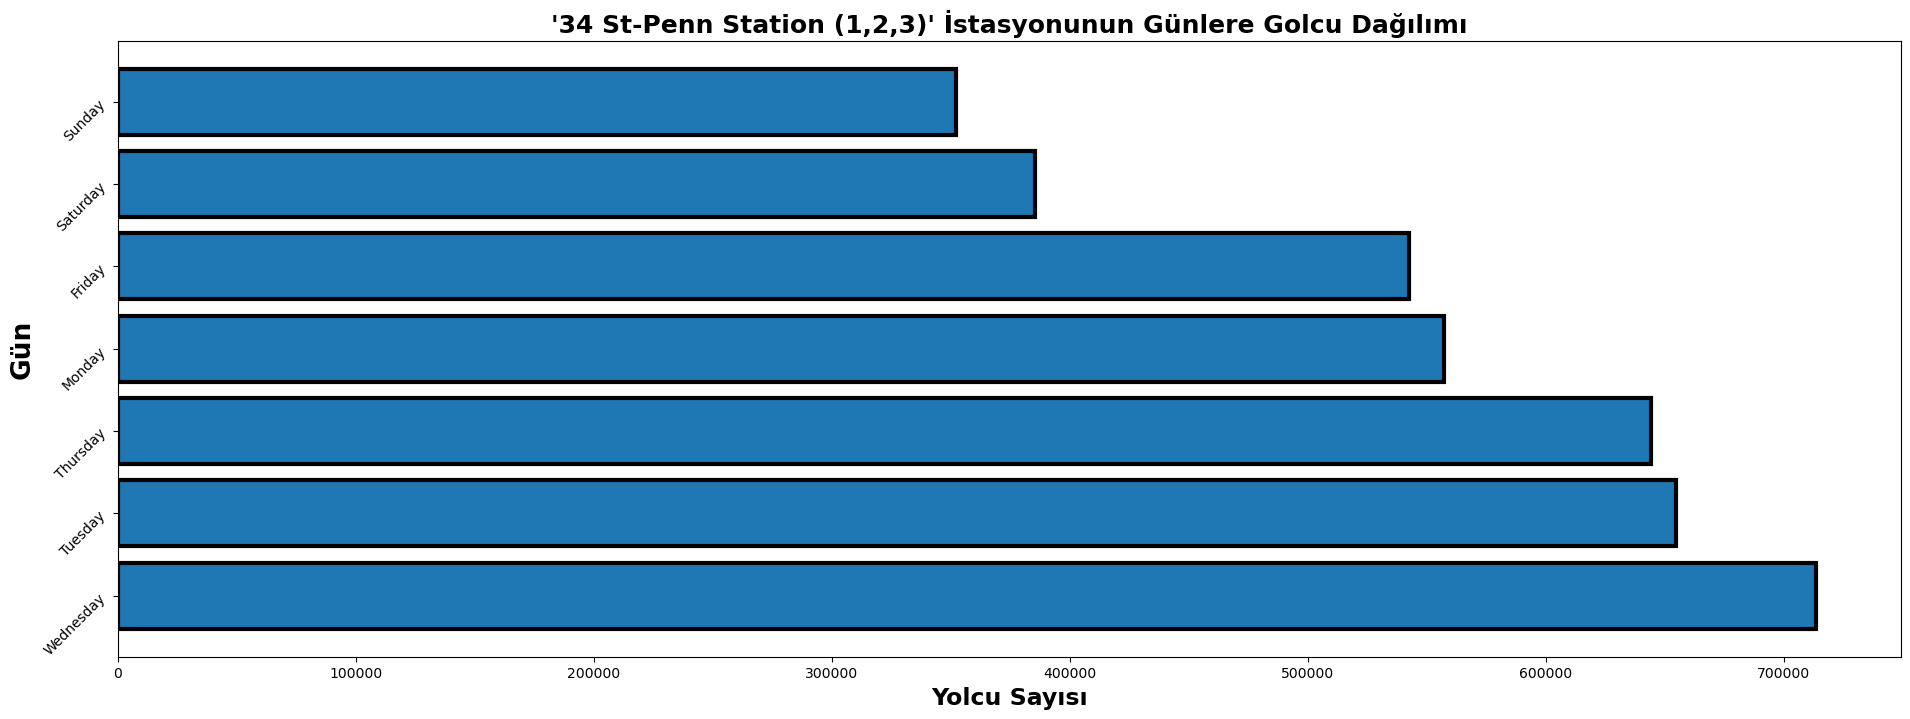

In [508]:
plt.figure(figsize=[23,8])
plt.title("'34 St-Penn Station (1,2,3)' İstasyonunun Günlere Golcu Dağılımı",fontweight="bold",fontsize=18)
plt.barh(df_day_34_st_penn_123_graph.index,df_day_34_st_penn_123_graph.ridership,edgecolor='black',linewidth=3)
plt.xlabel("Yolcu Sayısı",fontsize=17,weight="bold")
plt.ylabel("Gün",fontsize=19,weight="bold")
plt.yticks(rotation=45, ha='right');

In [509]:
## en cok yolcu alan dokuzuncu istasyonu gün bazında değerlendirelim

In [510]:
df_day_Flushing=df_day[df_day['station_complex']=="Flushing-Main St (7)"]

In [511]:
df_day_Flushing

,station_complex,ridership,date,time,time_group,daystr
3060901,Flushing-Main St (7),1439,2023-05-14,11:00:00,09-12 Late Morning,Sunday
3060904,Flushing-Main St (7),216,2023-03-12,00:00:00,Late Night,Sunday
3060916,Flushing-Main St (7),2029,2023-03-22,10:00:00,09-12 Late Morning,Wednesday
3060944,Flushing-Main St (7),418,2023-05-15,23:00:00,Late Night,Monday
3060952,Flushing-Main St (7),1156,2023-04-09,08:00:00,07-09 Morning,Sunday
...,...,...,...,...,...,...
3094711,Flushing-Main St (7),96,2023-05-15,01:00:00,Late Night,Monday
3094738,Flushing-Main St (7),1669,2023-03-27,12:00:00,12-14 Afternoon,Monday
3094740,Flushing-Main St (7),4327,2023-04-13,07:00:00,07-09 Morning,Thursday
3094742,Flushing-Main St (7),336,2023-05-02,04:00:00,Late Night,Tuesday


In [512]:
df_day_Flushing_graph=df_day_Flushing.groupby(['daystr'])[['ridership']].sum().sort_values('ridership',ascending=False)

In [513]:
df_day_Flushing_graph

,ridership
daystr,
Wednesday,622386
Tuesday,572711
Thursday,570984
Friday,564345
Monday,541334
Saturday,357165
Sunday,290703


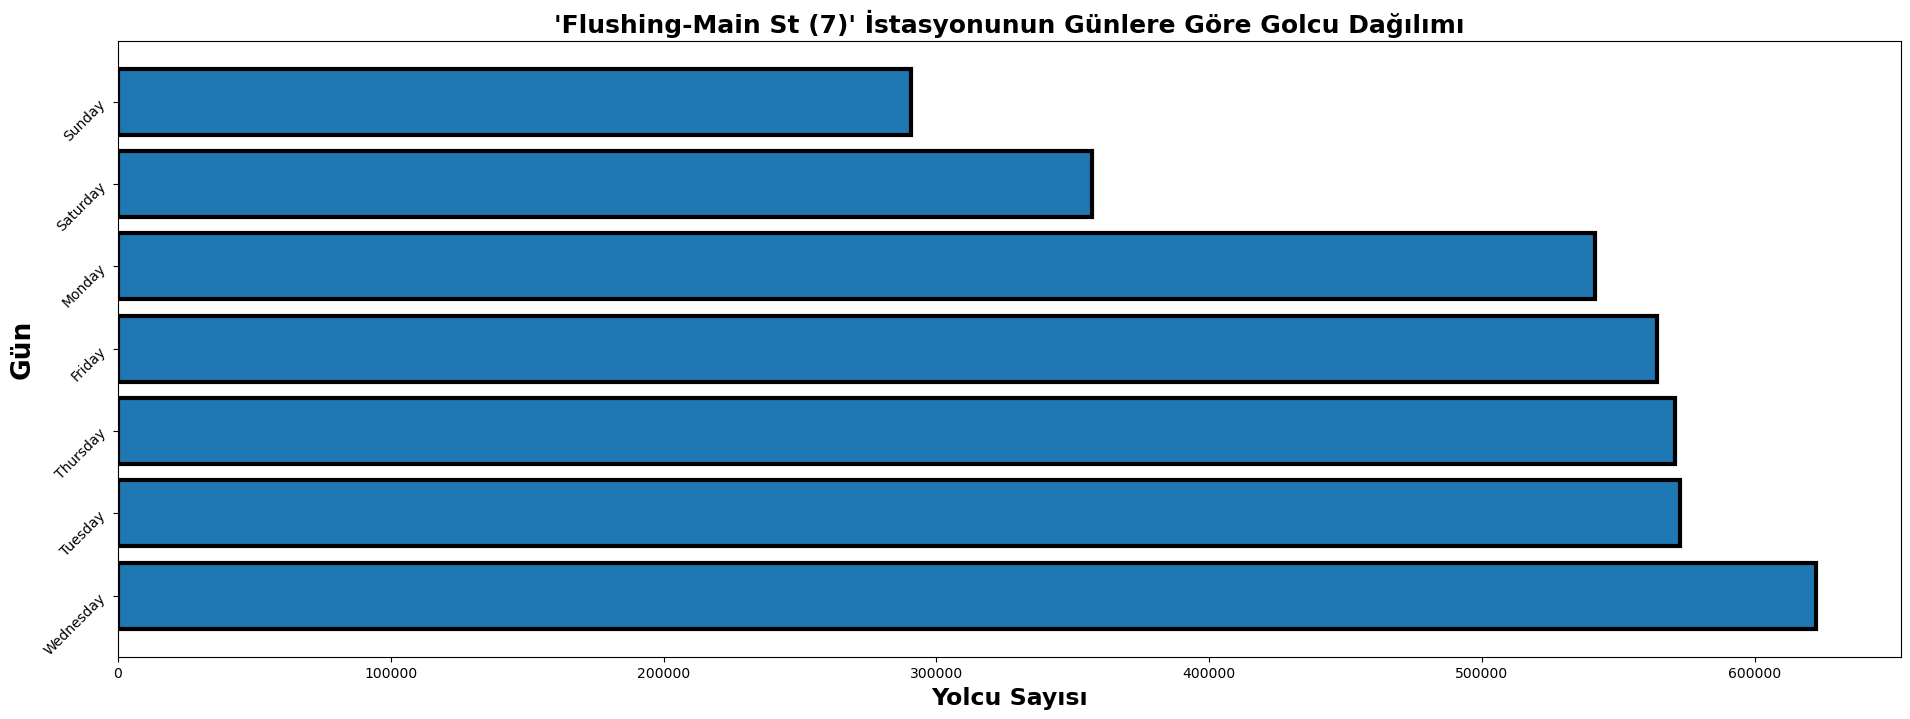

In [514]:
plt.figure(figsize=[23,8])
plt.title("'Flushing-Main St (7)' İstasyonunun Günlere Göre Golcu Dağılımı",fontweight="bold",fontsize=18)
plt.barh(df_day_Flushing_graph.index,df_day_Flushing_graph.ridership,edgecolor='black',linewidth=3)
plt.xlabel("Yolcu Sayısı",fontsize=17,weight="bold")
plt.ylabel("Gün",fontsize=19,weight="bold")
plt.yticks(rotation=45, ha='right');

In [515]:
## en cok yolcu alan onuncu istasyonu gün bazında değerlendirelim

In [516]:
df_day_74_broadway=df_day[df_day['station_complex']=="74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,M,R)"]

In [517]:
df_day_74_broadway

,station_complex,ridership,date,time,time_group,daystr
1465250,"74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,...",713,2023-03-03,22:00:00,19-23 Night,Friday
1465254,"74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,...",2145,2023-05-14,09:00:00,09-12 Late Morning,Sunday
1465279,"74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,...",226,2023-04-23,04:00:00,Late Night,Sunday
1465301,"74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,...",2650,2023-03-17,15:00:00,14-17 Late Afternoon,Friday
1465354,"74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,...",2188,2023-05-18,12:00:00,12-14 Afternoon,Thursday
...,...,...,...,...,...,...
1496770,"74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,...",1796,2023-03-24,13:00:00,12-14 Afternoon,Friday
1496782,"74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,...",510,2023-05-10,23:00:00,Late Night,Wednesday
1496796,"74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,...",148,2023-03-03,03:00:00,Late Night,Friday
1496813,"74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,...",153,2023-05-06,03:00:00,Late Night,Saturday


In [518]:
df_day_74_broadway_graph=df_day_74_broadway.groupby(['daystr'])[['ridership']].sum().sort_values('ridership',ascending=False)

In [519]:
df_day_74_broadway_graph

,ridership
daystr,
Wednesday,598569
Tuesday,552330
Thursday,552055
Friday,550967
Monday,517792
Saturday,398699
Sunday,334570


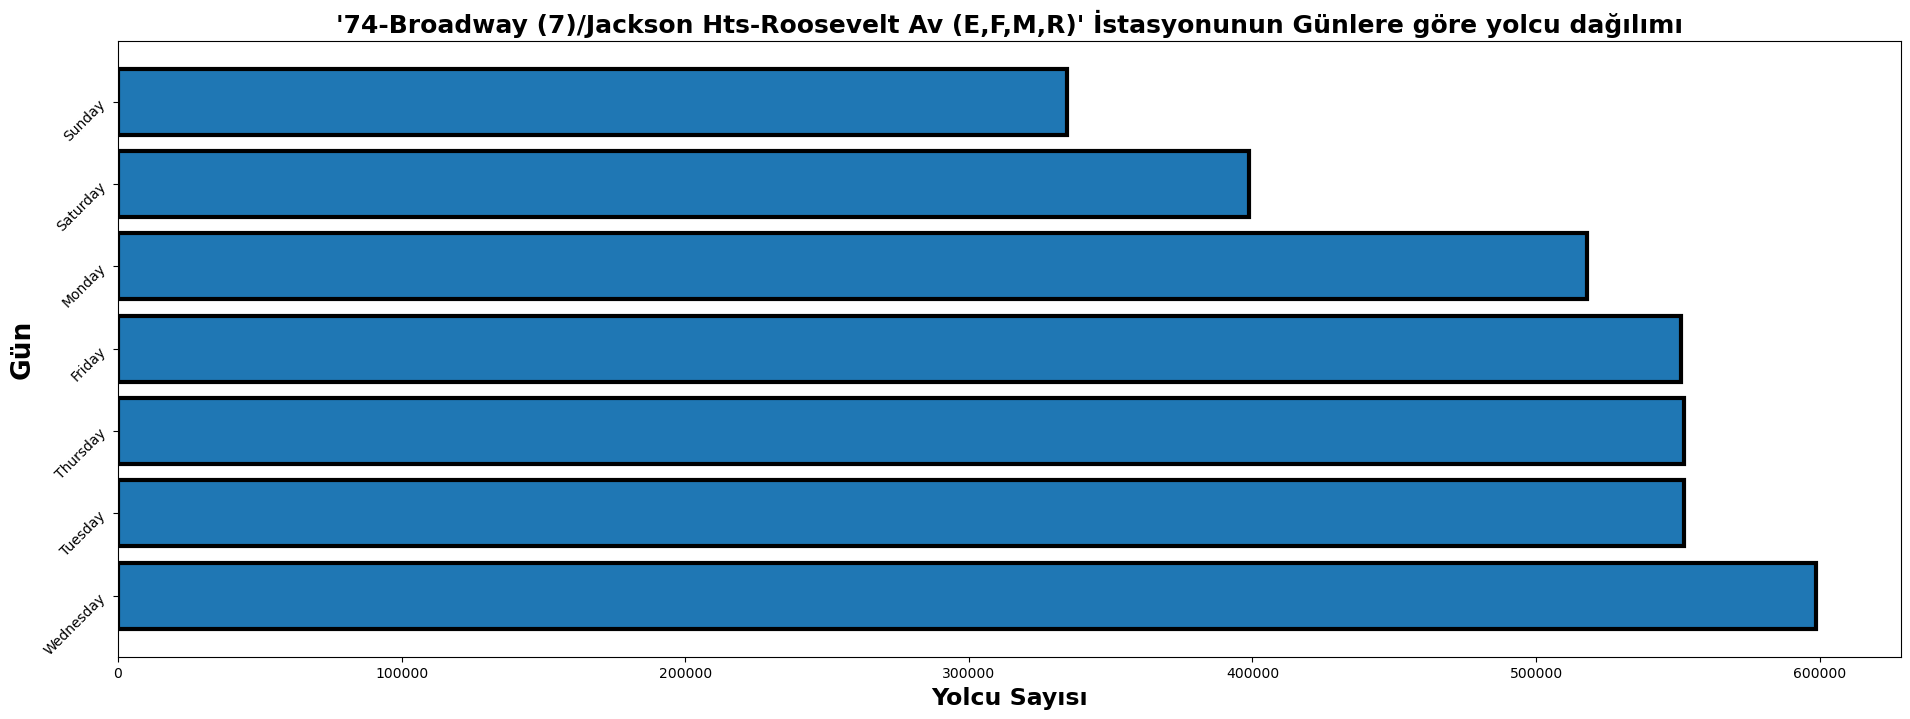

In [520]:
plt.figure(figsize=[23,8])
plt.title("'74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,M,R)' İstasyonunun Günlere göre yolcu dağılımı",fontweight="bold",fontsize=18)
plt.barh(df_day_74_broadway_graph.index,df_day_74_broadway_graph.ridership,edgecolor='black',linewidth=3)
plt.xlabel("Yolcu Sayısı",fontsize=17,weight="bold")
plt.ylabel("Gün",fontsize=19,weight="bold")
plt.yticks(rotation=45, ha='right');